In [1]:
# 
# Group 1 Team Members:
#     1. Judy Koech                                     6. Joseph Mwangi
#     2. Eugene Marius                                  7. Harris Lukundi
#     3. Henry Rono                                     8. Sheila Mulwa
#     4. Esther Njagi                                   9. Phinidy George
#     5. Grace Ndura                                   10. Chris Laaria
# 

# Exploring the Dynamics of Real Estate Market in King County: A Data Science Perspective

Business Overview
The `US` real estate market has seen fluctuations over time, generally trending upwards with occasional declines. This trend is driven by various factors, including supply and demand dynamics, economic conditions, interest rates, demographics, and location-specific elements

**Supply and demand** play a pivotal role in shaping house prices. Limited housing inventory compared to demand tends to drive prices higher, while an oversupply can lead to price decreases

**Economic factors**, such as employment levels, GDP growth, and inflation, influence both supply and demand. Favorable economic conditions stimulate demand, pushing prices up, while economic downturns can dampen demand, leading to stabilization or decline in prices.

**Interest rates** impact affordability, with lower rates boosting demand and prices, while higher rates may reduce demand and stabilize or lower prices.

**Demographic shifts**, like changes in household formation and migration patterns, affect housing preferences and demand. Location-specific factors, including proximity to employment, quality of schools, and neighborhood amenities, also influence prices.

Understanding these factors is crucial for navigating the real estate market effectively, whether buying, selling, investing, or developing properties.

## 1 PROJECT ALIGNMENT

### 1.1. Project Scope

Our project aims to equip Nara Real Estate(stakeholder) with the necessary insights and strategies to facilitate a successful entry into the King County real estate market. By leveraging data-driven analysis and market intelligence, we will provide actionable recommendations to navigate the complexities of the local market landscape effectively.

### 1.2. Problem Statement:

Despite its potential for growth and profitability, entering the King County real estate market presents Nara Real Estate with significant challenges stemming from the market's dynamic nature and diverse factors influencing supply, demand, and pricing. To ensure a successful market penetration strategy, Nara Real Estate requires a comprehensive understanding of local market dynamics, including the impact of economic conditions, demographic shifts, and location-specific elements on housing preferences and demand. Additionally, the company needs actionable insights and strategies derived from data-driven analysis to effectively identify lucrative market segments, optimize pricing strategies, and enhance client acquisition and retention efforts. Therefore, the overarching problem statement is to equip Nara Real Estate with the necessary tools, insights, and strategies to navigate the complexities of the King County real estate market and establish a strong presence while capturing market share effectively.

### 1.3. Objectives

Through our data analytics and market insights, we offer Nara Real Estate a strategic advantage by answering the following questions:

**1. House features affecting the prices of houses in King County**

Understanding home buyers' preferences can focus our campaign and help us guide clients in purchase of their new homes.

**2. Seasonal impact on house sale prices**

Understanding seasonal trends will influence when the campaign should be launched.

**3. Market trends and property value**

Using the dataset provided to create a model that predicts the market trend of the area and the property values.

**4. Locations which have the highest average house prices**

Understanding what locations to focus the advertising campaign on is key for our stakeholders.

We have been provided with a dataset with house sale prices in King County, Washington State, USA from May 2014 to May 2015 to use for this project.

### 1.4. Brief Conclusion

Through our comprehensive analysis and strategic recommendations, we aim to empower Nara Real Estate to make informed decisions and successfully enter the King County real estate market. Our data-driven approach will help them achieve sustainable growth and enance their penetration of King county real estate market..

## 2 DATA UNDERSTANDING
### Dataset Description

The data utilized for this project consists the following dataset:

`data/kc_house_data.csv`: This dataset contains detailed information about individual properties in King County, including attributes such as square footage, number of bedrooms and bathrooms, location, and sale price.

Here are the key columns in the datasets:

`id`: Unique identifier for each house sale.

`date`: Date of the house sale.

`price`: Sale price of the house.

`bedrooms`: Number of bedrooms in the house.

`bathrooms`: Number of bathrooms in the house.

`sqft_living`: Square footage of the living area.

`sqft_lot`: Square footage of the lot.

`floors`: Number of floors in the house.

`waterfront`: Whether the house has a waterfront view (0 for no, 1 for yes).

`condition`: Overall condition of the house.

`grade`: Overall grade given to the housing unit, based on King County grading system.

`sqft_above`: Square footage of the house above ground level.

`sqft_basement`: Square footage of the basement.

`yr_built`: Year the house was built.

`yr_renovated`: Year the house was renovated.

`zipcode`: Zip code of the house location.

`lat`: Latitude coordinate of the house.

`long`: Longitude coordinate of the house.

`sqft_living15`: Average square footage of interior housing living space for the nearest 15 neighbors.

`sqft_lot15`: Average square footage of the land lots of the nearest 15 neighbors.

### Relevance of king County dataset from stakeholder

The columns in the dataset provide crucial information about various aspects of the houses that could potentially influence their sale prices. Features such as number of bedrooms, bathrooms, square footage, condition, and grade are likely to have a significant impact on home values. We'll use these features to build regression models and identify which characteristics contribute most to home prices.

## 3 DATA PREPARATION

The approach taken shall involve the following steps:

1. Data Mining
2. Data Cleaning
3. Data Analysis 

### 3.1 DATA MINING
We shall import the necessary libraries for the whole data analysis approach we shall be taking as well as reading into the various documents that we shall be using. We shall display the first 5 results of each to get a better understanding of what is in each documents and give a summary of what we are observing

In [2]:
# libraries required for the data anaylsis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pio.renderers.default = 'notebook_connected'

**Relevance of king County dataset from stakeholder**

The columns in the dataset provide crucial information about various aspects of the houses that could potentially influence their sale prices. Features such as number of bedrooms, bathrooms, square footage, condition, and grade are likely to have a significant impact on home values. We'll use these features to build regression models and identify which renovations or characteristics contribute most to home prices.

### 3.1.1 Overview of kc_house_data dataset

In [3]:
# reading the data into the king_county_df
king_county_df=pd.read_csv("data/kc_house_data.csv")
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
king_county_df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [5]:
#Looking at the info printout
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(king_county_df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [7]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

Cursory Observation:
1. The dataframe has 21,597 entries with waterfront, view and yr_renovated having null entries
2. Datatypes range from int64, float64 and objects and will require further analysis
3. 21 columns in the dataset, further analysis to determine if all shall be used 

### 3.2. DATA CLEANING
Data cleaning shall involve the following steps:
1. Check and resolve for duplicate values
2. Check and resolve for null values
3. Check and resolve for extraneous values
4. Perform further cleaning as needed

In [8]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe
    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")


### 3.2.1 Check and resolve for duplicate values in King_county_df

In [9]:
#checking for duplicates in king_county_df
get_duplicates(king_county_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [10]:
#checking unique identifiers for houses
king_county_df["id"].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [11]:
# exploration of ID unique identifier 795000620
king_county_df[king_county_df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [12]:
# difference in unique house identifiers and total entries
multiple_times_sold=len(king_county_df["id"])-len(king_county_df["id"].value_counts())
print(f"No of houses sold more than once in a year: ", multiple_times_sold )

No of houses sold more than once in a year:  177


Cursory Observations

The length of the unique identifier ID is 21,420 which is less than the 21,597 entries seen from the info printout. This would indicate duplicates of the unique identifier but we can see that each entry is unique to the database.
We can conclude that there are 177 houses that have been sold more than once between May 2014 and May 2015. We can hence conclude that there are no duplicates and that there is flipping of houses. This can be confirmed by a report by ATTOM team (reference link in appendix) showing steady growth in house flipping in the US.

### 3.2.2 Check and resolve for null values in king_county_df

In [13]:
#checking for null values in the king_county dataset
king_county_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Checking the counts for each value in the column waterfront
king_county_df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [15]:
# percentage of missing data
missing_data(king_county_df, king_county_df["waterfront"])

# Replacing Nan Values in Waterfront column
king_county_df["waterfront"].fillna(king_county_df["waterfront"].mode()[0], inplace= True)
king_county_df["waterfront"].value_counts()


Percentage of Missing Data: 11.0%


NO     21451
YES      146
Name: waterfront, dtype: int64

Observation: 

The Null values account for 11% of the dataset. While dropping these rows would be possible, we would lose quite a bit of data for this dataset and this may affect or skew the results. As the most common value is NO we assume that the NaN values are also NO and replace with it.

In [16]:
# Checking the counts for each value in the column yr_renovated
king_county_df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
# percentage of missing data
missing_data(king_county_df,king_county_df["yr_renovated"])

# Replacing NaN values in yr_renovated column
king_county_df["yr_renovated"].fillna(king_county_df["yr_renovated"].mode()[0], inplace= True)
king_county_df["yr_renovated"].value_counts()

Percentage of Missing Data: 17.79%


0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Observation: 
Similar to the Waterfront column, dropping the missing data would greatly affect the dataset and hence we shall replace the Nan values with 0.0 which is the most common value in the column

In [18]:
# Checking the counts for each value in the column view
king_county_df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
# percentage of missing data
missing_data(king_county_df, king_county_df["view"])

# Dropping NaN values in view column
king_county_df.dropna(subset=["view"], inplace=True)
king_county_df["view"].value_counts(normalize=True)

Percentage of Missing Data: 0.29%


NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

Observation:
The percentage of missing date is less than 1% of the dataset. We can drop these rows without causing much effect to the overall dataset. 

In [20]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [21]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observation:
1. The null values that were present in the dataset have now been resolved either by dropping the rows or replacing them.
2. The dataframe now contains 21,534 entries with no null values present.

### 3.2.3 Check and resolve for extraneous values in king_county_df

In [22]:
# Checking for extraneous values in all columns
extraneous_values(king_county_df)

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
                ...   
3021059276    0.000046
880000205     0.000046
8165500110    0.000046
9492500170    0.000046
1777500160    0.000046
Name: id, Length: 21357, dtype: float64 

date 
 6/23/2014     0.006594
6/26/2014     0.006083
6/25/2014     0.006083
7/8/2014      0.005898
4/27/2015     0.005758
                ...   
1/17/2015     0.000046
11/30/2014    0.000046
11/2/2014     0.000046
5/15/2015     0.000046
8/3/2014      0.000046
Name: date, Length: 371, dtype: float64 

price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3613, dtype: float64 

bedrooms 
 3     0.454676
4     0.318798
2     0.127891
5     0.074115
6     0.012538
1     0.009102
7     0.001765

Observation:
 * There is a placeholder in the sqft_basement column i.e ? which needs to be replaced
 * There also seems to be an extraneous value in the bedrooms columns i.e. 33 bedrooms
 * All other columns do not seem to have any extraneous values

In [23]:
# Checking the counts for each value in the column sqft_basement
king_county_df["sqft_basement"].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
506.0         1
2050.0        1
2130.0        1
508.0         1
784.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [24]:
# Checking column datatype
print(f"datatype for column:", king_county_df["sqft_basement"].dtype)

# creating a variable to hold the dataframe with sqft basement with a datatype of float
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors="coerce")

datatype for column: object


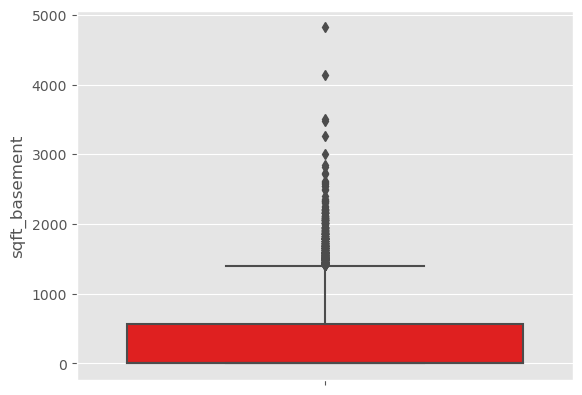

In [25]:
#Quick plot to check for outliers in the data set
sns.boxplot(y=king_county_df['sqft_basement'],color="r");

In [26]:
# Median value is selected as it is not affected by the outliers
median_value=king_county_df['sqft_basement'].median()
print(median_value)

# replacing placeholder value with median_value derived above
king_county_df["sqft_basement"].replace(np.nan,median_value, inplace=True)
king_county_df["sqft_basement"].unique()

0.0


array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  840.,
        380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,  120.,
        650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,  750.,
        640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,  210.,
       1430., 1950.,  440.,  220., 1160.,  860.,  580., 2060., 1820.,
       1180.,  200., 1150., 1200.,  680.,  530., 1450., 1170., 1080.,
        960.,  280.,  870., 1100.,  460., 1400.,  660., 1220.,  900.,
        420., 1580., 1380.,  475.,  690.,  270.,  350.,  935.,  710.,
       1370.,  980.,  850., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [27]:
king_county_df['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Length: 301, dtype: int64

In [28]:
# Checking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [29]:
king_county_df[king_county_df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [30]:
king_county_df[king_county_df["bedrooms"]==3][:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


Observation:
In the bedrooms column, from domain knowledge we know that it is not possible for a house to have 33 bedrooms in a living space of 1620 sqft. Compared to 3 bedroom houses, the former seems to be a typing error and we shall replace 33 bedrooms with 3 bedrooms

In [31]:
# replacing erroneous value with rationalized value
king_county_df["bedrooms"].replace(33,3, inplace=True)
king_county_df["bedrooms"].value_counts()

3     9792
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [32]:
king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.371645,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.904144,0.768602,917.446520,4.138021e+04,0.539806,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Observation:
All extraneous and placeholder values have be catered for and we can see that all the values fall withing acceptable parameters which may include outliers


### 3.2.4  Perform further cleaning as needed in king_county_df

Further Feature engineering to know in which seasons a house was sold.

In [33]:
# applying mapping to determine which season relates to each month
season_mapping={
    "03": "Spring", "04": "Spring", "05": "Spring",
    "06": "Summer", "07": "Summer", "08": "Summer",
    "09": "Autumn", "10": "Autumn", "11": "Autumn",
    "12":"Winter", "01":"Winter", "02":"Winter"
}
king_county_df["seasons"] = date_df.apply(lambda x: x.strftime('%m')).map(season_mapping)
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'seasons'],
      dtype='object')

In [34]:
king_county_df["seasons"].value_counts()

Spring    6493
Summer    6320
Autumn    5042
Winter    3679
Name: seasons, dtype: int64

In [35]:
## Age of the House
# Calculating the age of the house by subtracting the year built from 2015.
current_year = 2015
king_county_df['house_age'] = current_year - king_county_df['yr_built']
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'seasons', 'house_age'],
      dtype='object')

In [36]:
## Renovated Status for renovated, 0 for not renovated).
# This feature captures the potential impact of renovations on house prices.
# Creating a binary feature indicating whether the house has been renovated (1 for renovated, 0 for not renovated)
king_county_df['renovated'] = (king_county_df['yr_renovated'] != 0).astype(int)

# Count the unique values in the 'renovated' column
renovated_counts = king_county_df['renovated'].value_counts()

# Display the counts
print("Counts of unique values in the 'renovated' column:")
print(renovated_counts)

Counts of unique values in the 'renovated' column:
0    20791
1      743
Name: renovated, dtype: int64


In [37]:
#dropping columns that do not provide actionable insight
to_drop = [
'id',
'sqft_living15',
'sqft_lot15',
]
king_county_df.drop(columns=to_drop, inplace=True)

In [38]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21534 non-null  object 
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  float64
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  float64
 7   waterfront     21534 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21534 non-null  object 
 10  grade          21534 non-null  object 
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  float64
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  season

In [39]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in king_county_df.columns:
    if king_county_df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['date', 'waterfront', 'view', 'condition', 'grade', 'seasons']
Numerical columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'house_age', 'renovated']


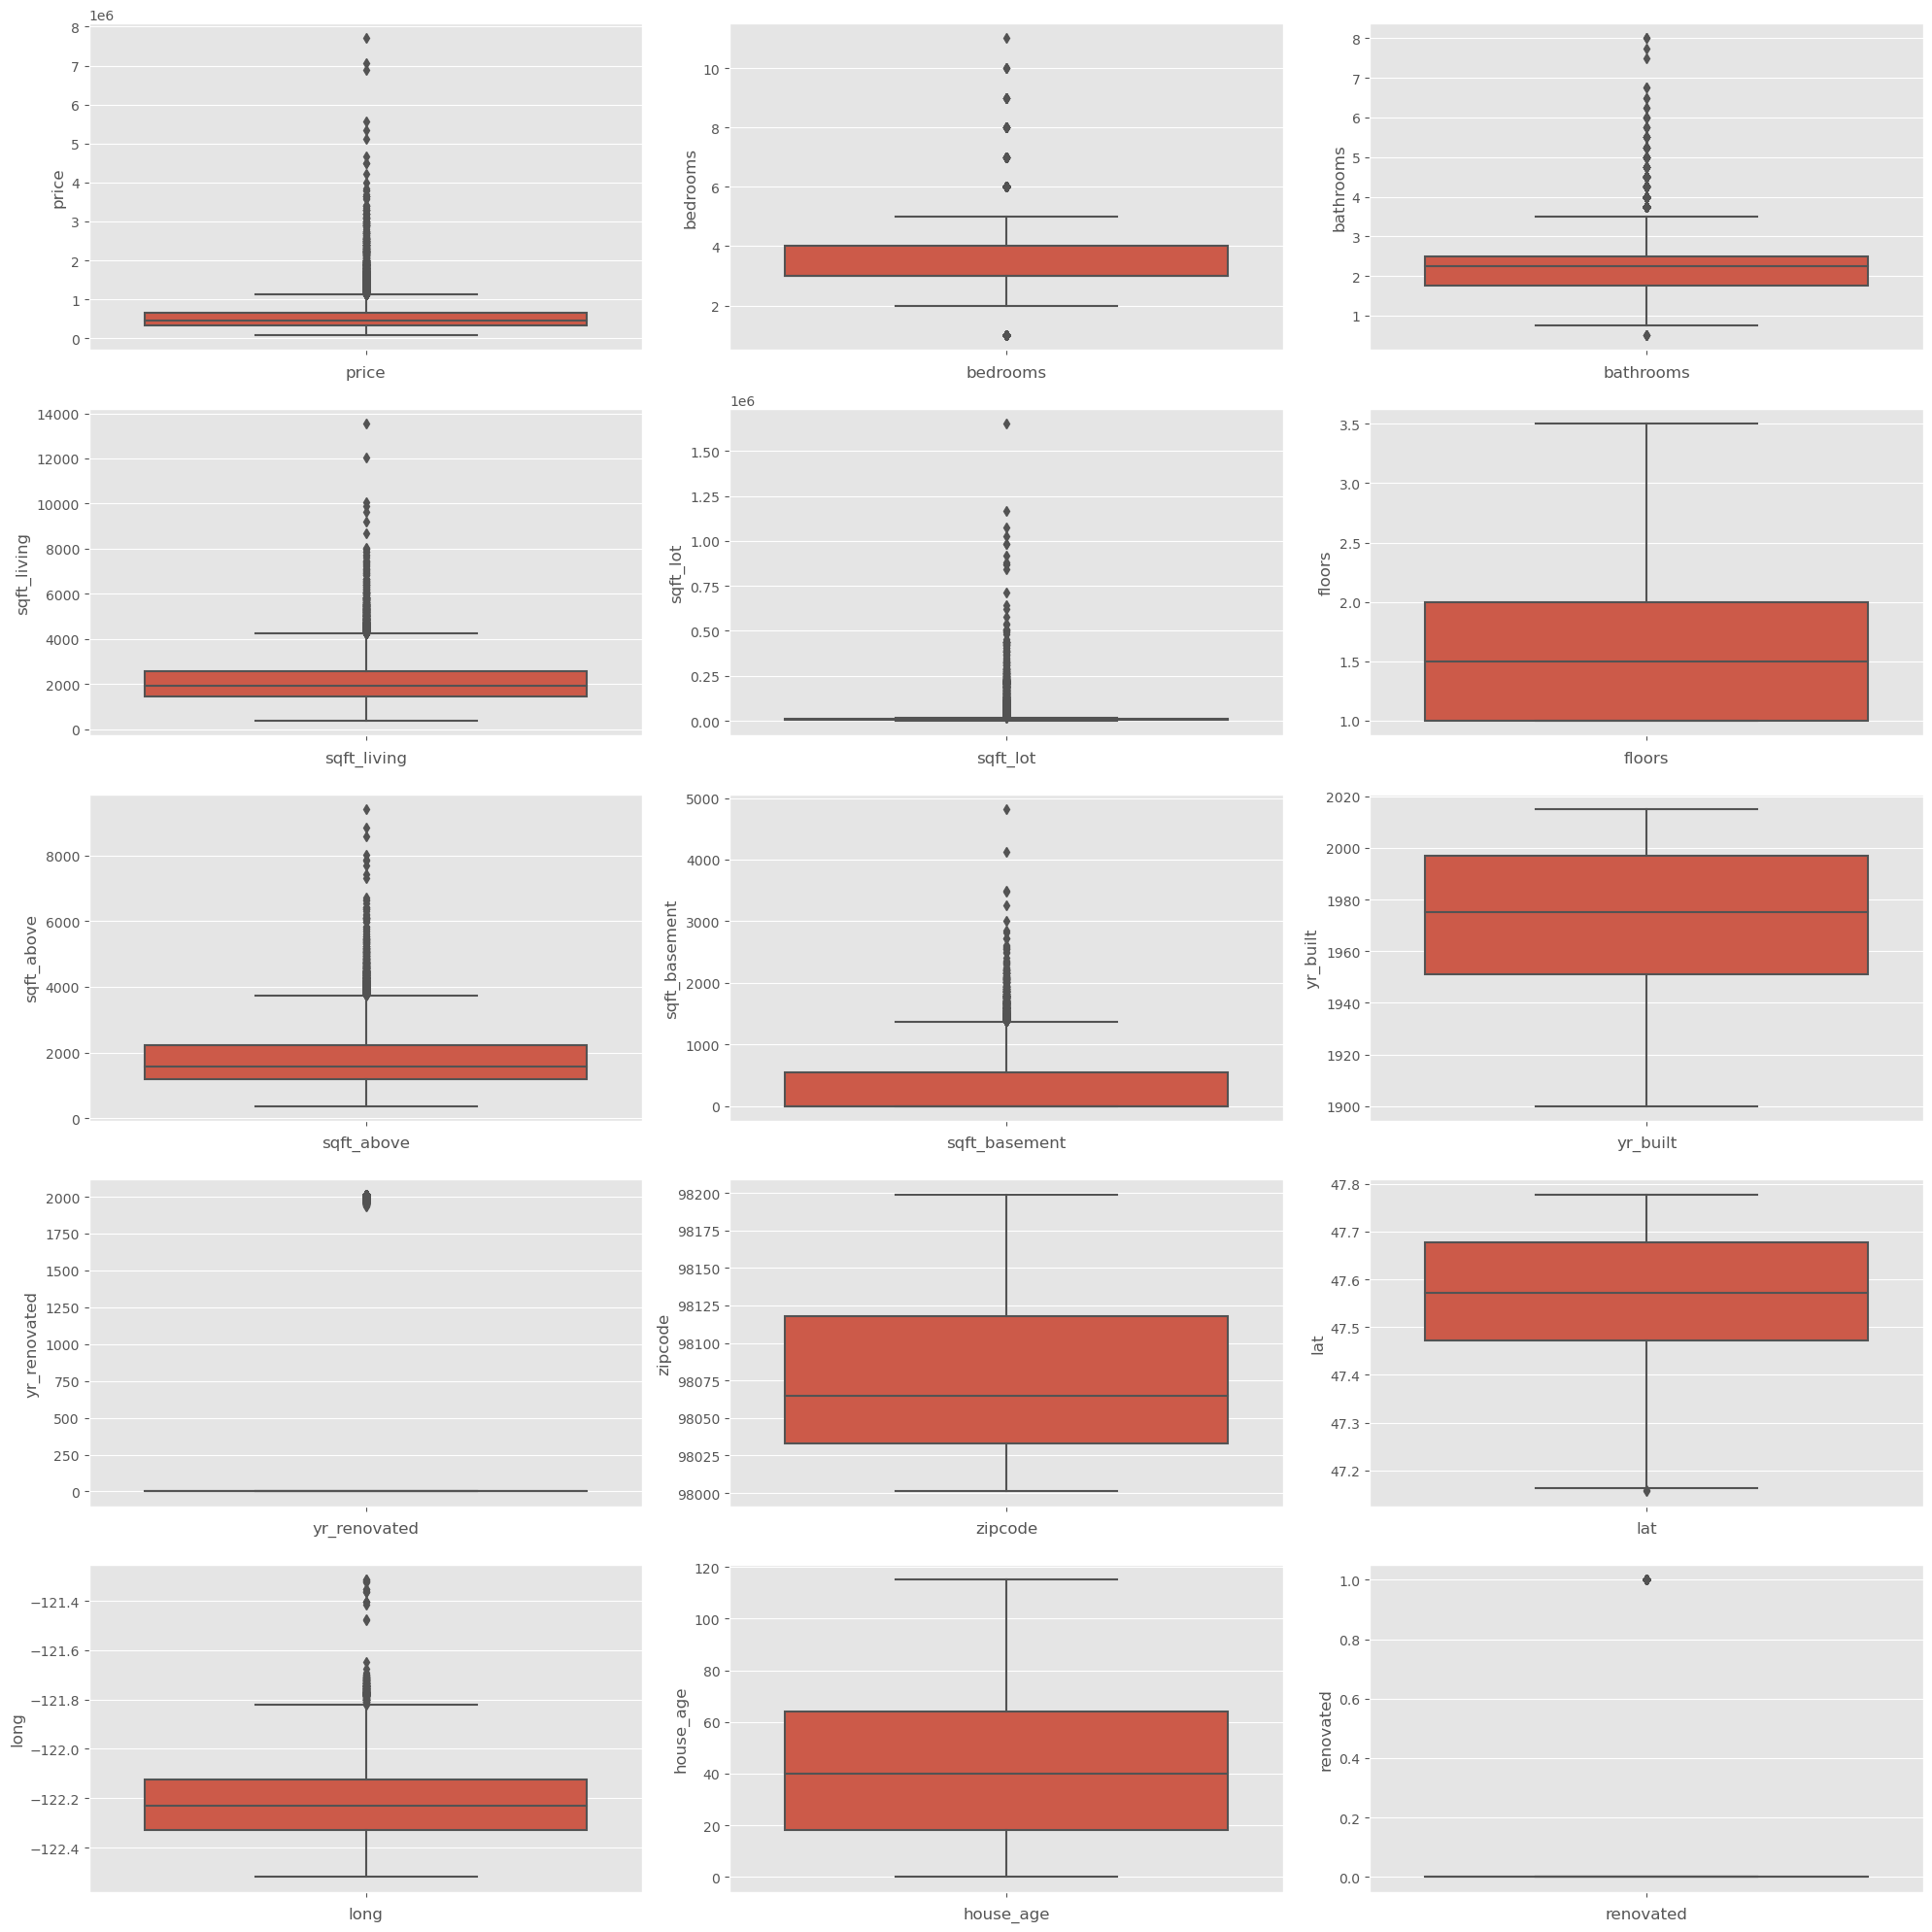

In [40]:
# Outlier Analysis for numeric variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Iterate over the columns and create the box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=king_county_df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel(column)  

plt.tight_layout()
plt.show()

Observation:
   1. Multiple numeric variables have outliers but given that this is real data, we will avoid removing outliers as it will not give accurate insight into the dataset.
   2. Numeric variables such as zipcode, latitude and longitude seem not to have an outliers at all but from our domain knowledge we know that they are data related to the location of the data hence we can assertain that all the information is for King County City
   3. We also see that variable floor and year built have no outliers showing that houses built range between approximately the years 1950 and 2000 while the houses are do not go above 3.5 floors indicating no highrises/skyscrapers were sold in that calendar year

## 4 EXPLORATORY DATA ANALYSIS

### 4.1. Univariate EDA

We'll explore the distribution of individual variables.

In [41]:
pd.concat([
    king_county_df.describe().T,
    king_county_df.select_dtypes('number').apply(lambda x: x - x.mean()).abs().mean().rename('mad'),
    king_county_df.skew(numeric_only=True).rename('skew'),
    king_county_df.kurt(numeric_only=True).rename('kurt'),
    king_county_df.mode(numeric_only=True).iloc[0].rename('mode'),
    king_county_df.isnull().mean().rename('missing'),
    king_county_df.nunique().rename('nunique'),
], axis=1).T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,lat,long,house_age,renovated,date,waterfront,view,condition,grade,seasons
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,...,21534.000000,21534.000000,21534.000000,21534.000000,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.400577e+05,3.371645,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,285.244311,1971.002275,68.866722,...,47.560180,-122.213948,43.997725,0.034504,NaN,NaN,NaN,NaN,NaN,NaN
std,3.660596e+05,0.904144,0.768602,917.446520,4.138021e+04,0.539806,827.745641,439.334095,29.376044,364.314552,...,0.138528,0.140735,29.376044,0.182523,NaN,NaN,NaN,NaN,NaN,NaN
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,...,47.155900,-122.519000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,...,47.471200,-122.328000,18.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,...,47.571900,-122.230000,40.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,...,47.678100,-122.125000,64.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,...,47.777600,-121.315000,115.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
mad,2.337691e+05,0.732005,0.614536,697.780558,1.381088e+04,0.488435,640.115529,359.443545,24.564997,132.981148,...,0.114810,0.115094,24.564997,0.066626,NaN,NaN,NaN,NaN,NaN,NaN
skew,3.974402e+00,0.550696,0.515035,1.469694,1.310992e+01,0.615262,1.447844,1.604663,-0.469533,5.101680,...,-0.486295,0.885081,0.469533,5.101163,NaN,NaN,NaN,NaN,NaN,NaN


Observations: 

* Sale prices (price) in the dataset range nearly 3 orders of magnitude, from a low of about 78,000 to a staggering high of 7,700,000.

* Sale prices exhibit a positive skew, meaning that they display a right-skewed distribution where the mean is to the right of the median.

* A home has sold 11 times (the maximum value of bedrooms) within the time span covered by the data, though the most common number of sales is 1.

* The oldest home in the dataset is evidently more than 100 years old, with a recorded build date (yr_built) of 1900; the median build year is 1975.

* The improved tax value (sqft_living) and land tax value (sqft_lot) both range from 370 to more than 13,540.

* The largest property in the dataset covers over 1,651,359 sqft (sqft_lot), or more than 380 acres.

* The smallest home in the dataset is recorded as having 370 sqft (sqft_living), less than the smallest first floor which has 370 sqft (sqft_above)⁠—worth flagging.

* Considering the columns independently, homes in the dataset most commonly have 1 story (floors), 3 beds (bedrooms), and 2 baths (bathrooms).

* The sales data includes 116 unique dates (yr_built), suggesting the dataset has comprehensive coverage of the full 20+ year span.

* The dataset spans dozens of assessment areas (lat) and cities (long), as well as submarkets (lat) and subdivisions (long). Aside from sale numbers and subdivisions, the data have no explicitly missing (NaN) values; some columns may use a missingness indicator value (e.g., 0).

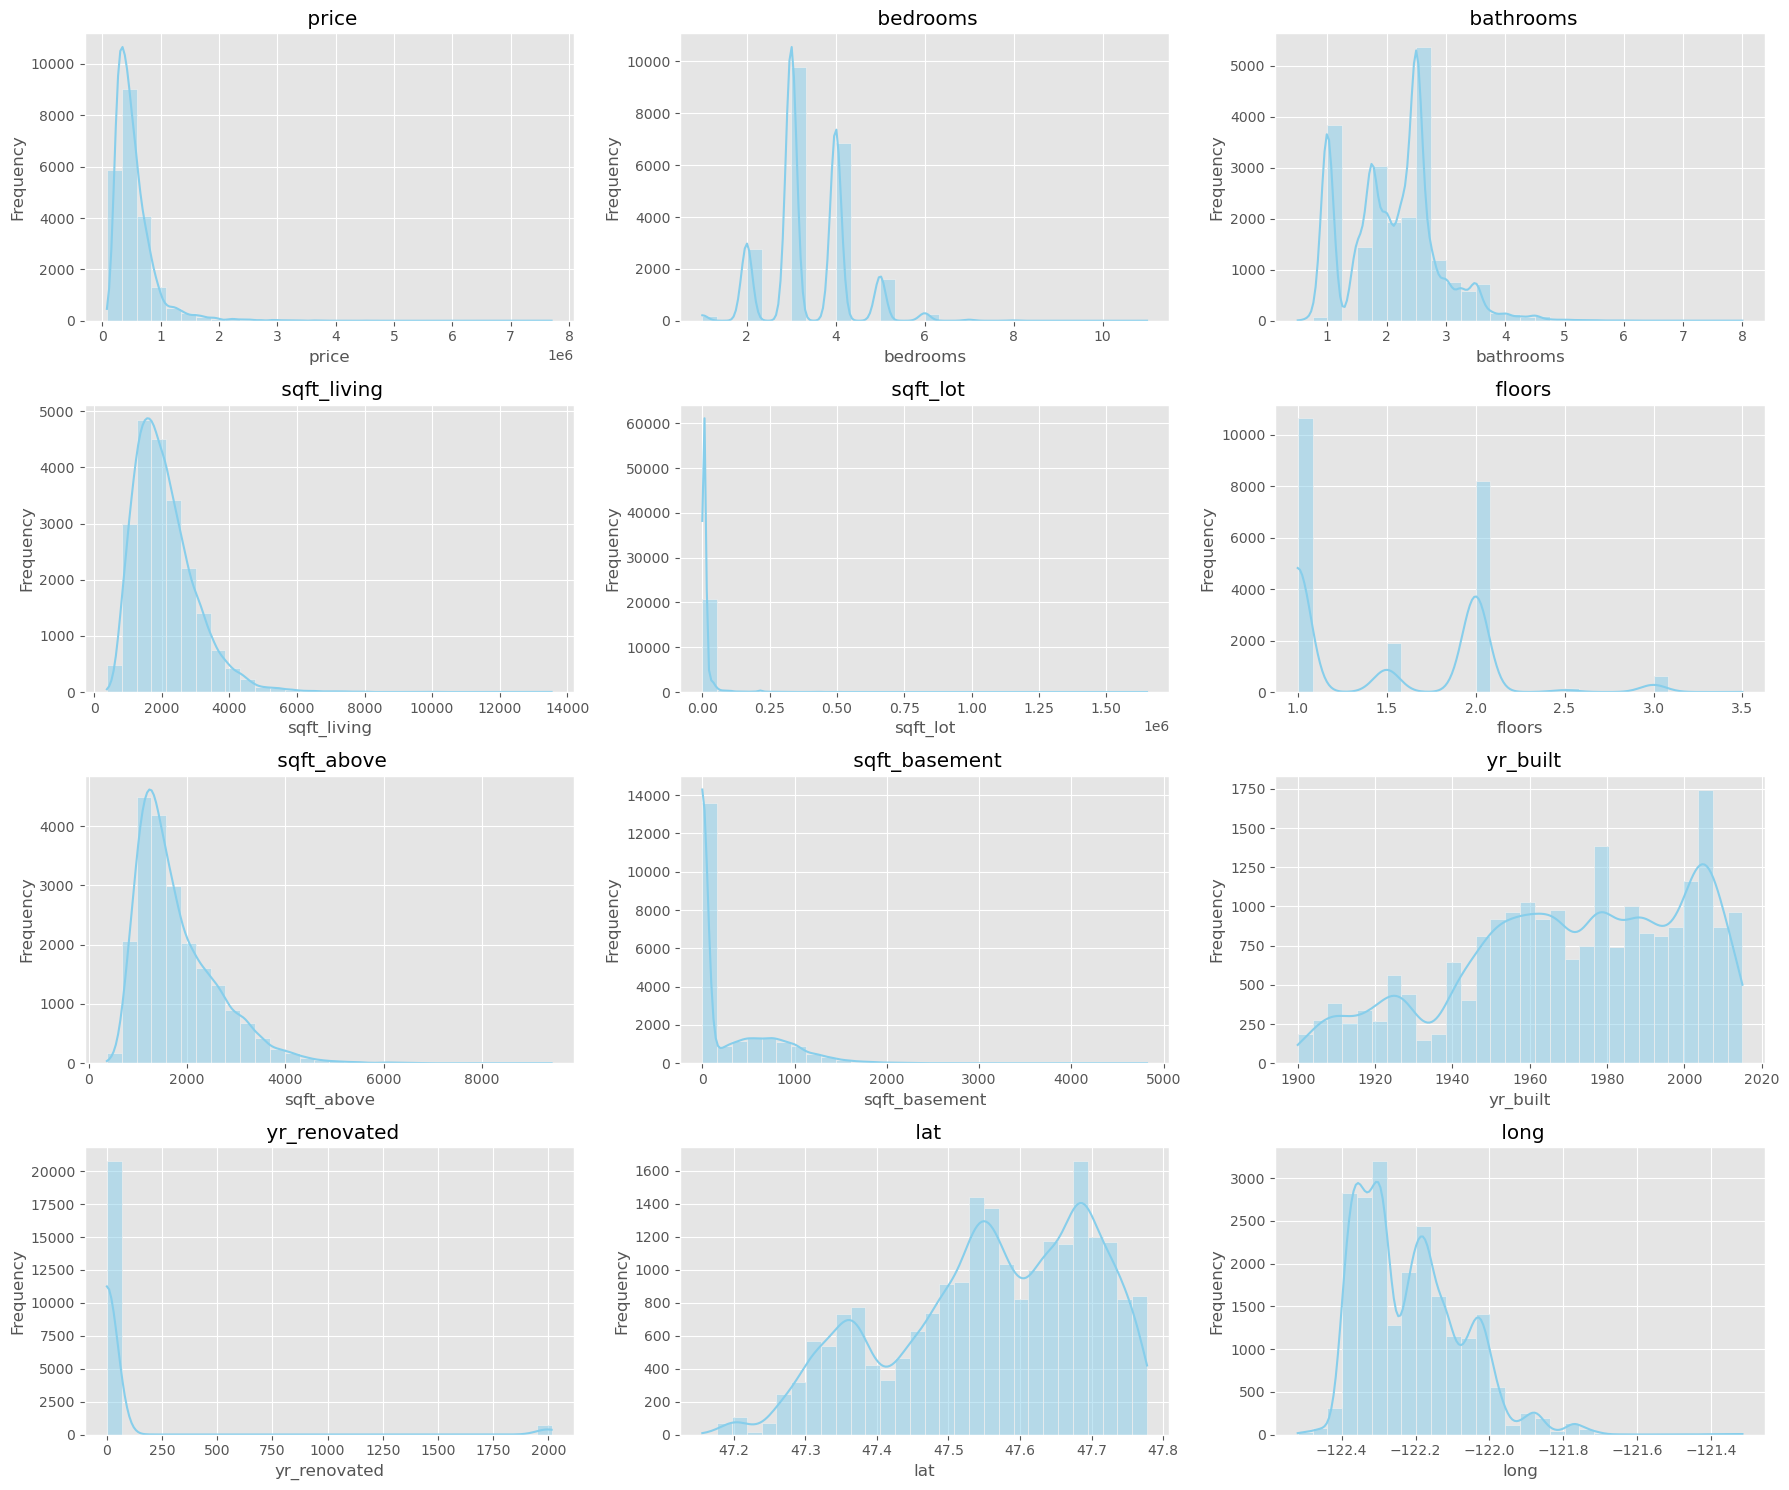

In [42]:
# Define a list of numerical columns
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(king_county_df[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(f' {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Bedrooms and Bathrooms**:

Most houses have around 3 bedrooms and 2 bathrooms.
These features could be relevant for predicting house prices. More bedrooms and bathrooms might lead to higher prices.

**Square Footage Variables**:

Sqft_living (square footage of the home), sqft_above (square footage apart from the basement), and sqft_basement all show right-skewed distributions.
Smaller living spaces are more common, which could impact house prices. Larger square footage might correlate with higher prices.

**Floors**:

The histogram for floors indicates that single-story homes are most common.
The number of floors might influence house prices. Single-story homes could have different pricing dynamics than multi-story ones.

**Year Built and Year Renovated**:

Yr_built shows that many houses were built in recent decades.

Yr_renovated has a large spike at zero, indicating that many homes have not been renovated.
These features could impact house prices. Newer homes or recently renovated ones might command higher prices.

**Latitude and Longitude**:

The histograms for latitude and longitude could indicate clustering by location.
Geographical location might play a significant role in house prices. Certain neighborhoods or regions could have higher or lower prices.

**UNDERSTANDING SALES PRICE**


The core challenge in this dataset is to understand the effect that many factors can have on the price a home sells for, including across geography and season.

We are going to start by plotting the overall distribution of sale prices


In [43]:
king_county_df['price'].describe()

count    2.153400e+04
mean     5.400577e+05
std      3.660596e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [44]:
def plot_histogram_with_median_line(df, x_column):
    """
    Plot a histogram of a column in a DataFrame with a vertical line representing the median value.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to plot as the x-axis.

    Returns:
        None
    """
    # Plot histogram
    fig = px.histogram(df, x=x_column, marginal="box", nbins=200, title="Distribution of " + x_column)
    fig.update_xaxes(title_text=x_column)
    fig.update_yaxes(title_text='Count')

    # Adding a vertical line to represent the median value
    median_value = df[x_column].median()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=median_value, x1=median_value, y0=0, y1=1, xref='x', yref='paper'
    )

    # Show the figure
    fig.show()
plot_histogram_with_median_line(king_county_df, "price")

Observations: 
1. The curve has a sharp peak on the left side, indicating that a significant number of items fall within a lower price range.

2. The positive skewness (longer tail on the right) implies that there are some outliers with much higher prices.


In [45]:
# Calculate skewness and kurtosis
skw = skew(king_county_df['price'])
kurt = kurtosis(king_county_df['price'])

# Print the results
print("Skewness:", skw)
print("Kurtosis:", kurt)

Skewness: 3.9741247585096726
Kurtosis: 33.85260123948197


Observation: 
in the case of right-skewed data like this, we might consider applying a transformation like the
logarithmic transformation to make the distribution more symmetric.

In [46]:
plot_histogram_with_median_line(king_county_df, "price")

In [47]:
def plot_histogram_with_median_line(df, x_column):
    """
    Plot a histogram of a column in a DataFrame with a vertical line representing the median value.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to plot as the x-axis.

    Returns:
        None
    """
    # Plot histogram
    fig = px.histogram(df, x=np.log(df[x_column]), marginal="box", nbins=200, title="Distribution of log(" + x_column + ")")
    fig.update_xaxes(title_text="log(" + x_column + ")")
    fig.update_yaxes(title_text='Count')

    # Adding a vertical line to represent the median value
    median_value = np.log(df[x_column]).median()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=median_value, x1=median_value, y0=0, y1=1, xref='x', yref='paper'
    )

    # Show the figure
    fig.show()


plot_histogram_with_median_line(king_county_df, "price")


Observation:

It's clear that the sale prices are heavily right-skewed—that is, the mean of the distribution tends to be to the right of the median, with a very long tail of higher-priced homes.
However, the prices do conform more closely to a normal distribution on the log scale.



**UNDERSTANDING SQUARE FOOTAGE**

Now let's see what role the size of the home plays by looking at the square footage. I'm going to plot the distribution of the square footage features.

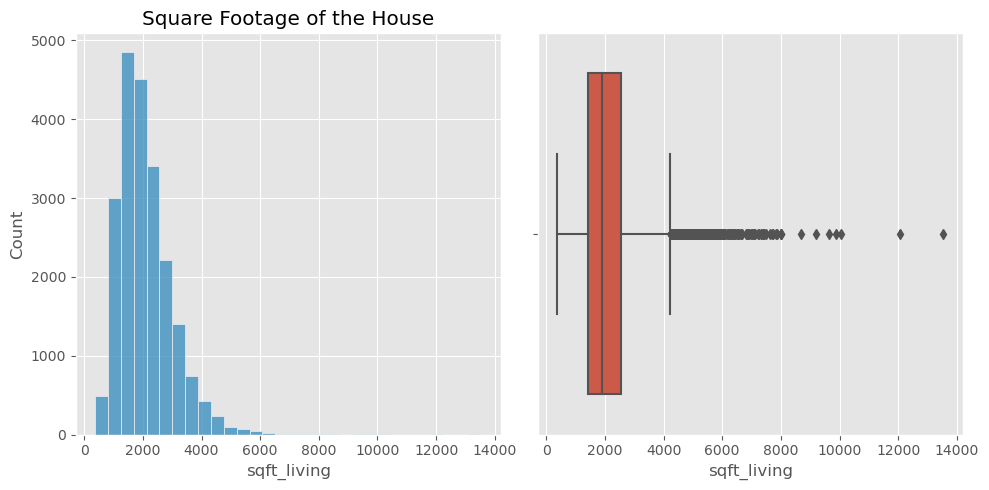

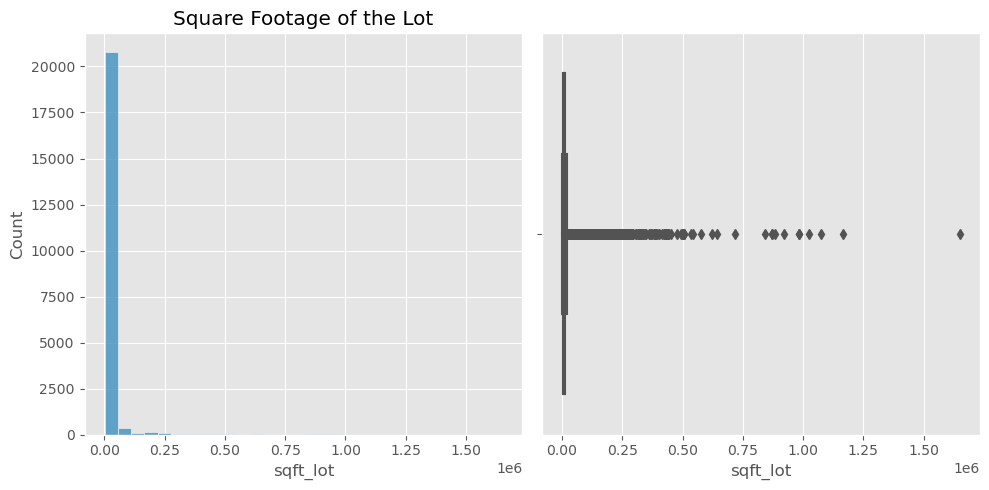

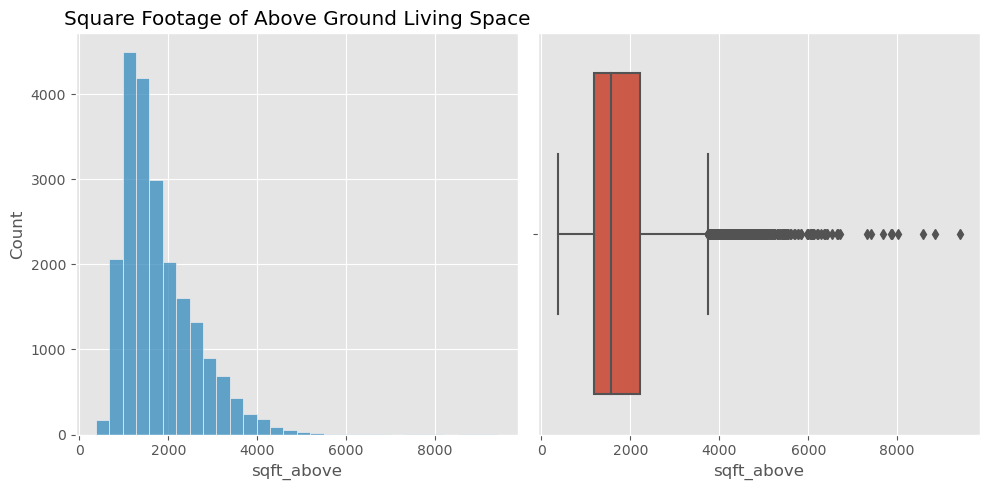

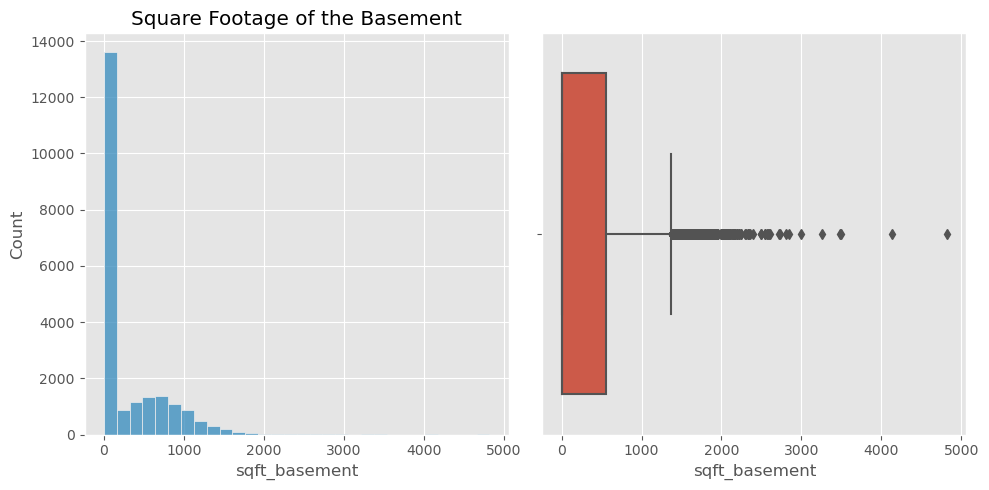

In [48]:

# Assuming king_county_df is your DataFrame and it has been properly cleaned and preprocessed
features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
titles = ['Square Footage of the House', 'Square Footage of the Lot',
          'Square Footage of Above Ground Living Space', 
          'Square Footage of the Basement']

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    
    # Plotting histogram
    plt.subplot(1, 2, 1)
    sns.histplot(king_county_df[feature], kde=False, bins=30)
    plt.title(titles[i])
    
    # Plotting boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=king_county_df[feature])
    
    plt.tight_layout()
    plt.show()


**Square footage of the house**

Most houses have a square footage between 0 and 4000 sqft, as indicated by the peak in the histogram.
The rapid decline in counts as square footage increases suggests that larger houses are less common.
Understanding this distribution is crucial for modeling because it helps us identify the typical size of houses in the dataset.

**Square footage of the lot**

There are several outliers on the higher end of the square footage (sqft_lot) scale. These represent houses with exceptionally large lots.
Handling these outliers is crucial for building an accurate predictive model.
may choose to remove them if they are extreme or erroneous.Or consider transforming the sqft_lot feature (e.g., log transformation) to mitigate the impact of outliers.

**Square footage of Above Ground living space**

Most houses have between 0 to 4000 sqft of above-ground living space.
There’s a rapid decline in the number of houses as we move towards higher square footage values
Outliers (represented by dots beyond the whiskers) are houses with unusually large square footage

**Square footage of the Basement**

Most houses have smaller basements, as indicated by the high count near the 0 sqft mark.
This could imply that smaller basements are more common or that many houses don’t have basements at all.



### 4.2 Bivariate EDA

Exploring the interplay among variables.

Our bivariate EDA encompasses scrutinizing the connections between various features and the price.

**Relationship with the features**

Now, let’s delve deeper by employing scatter plots to visually assess the linear relationships between individual features and the target variable. This exploration will provide a more granular understanding of how each feature contributes to the predictive dynamics of the target variable.

**Relationship with  numerical features**

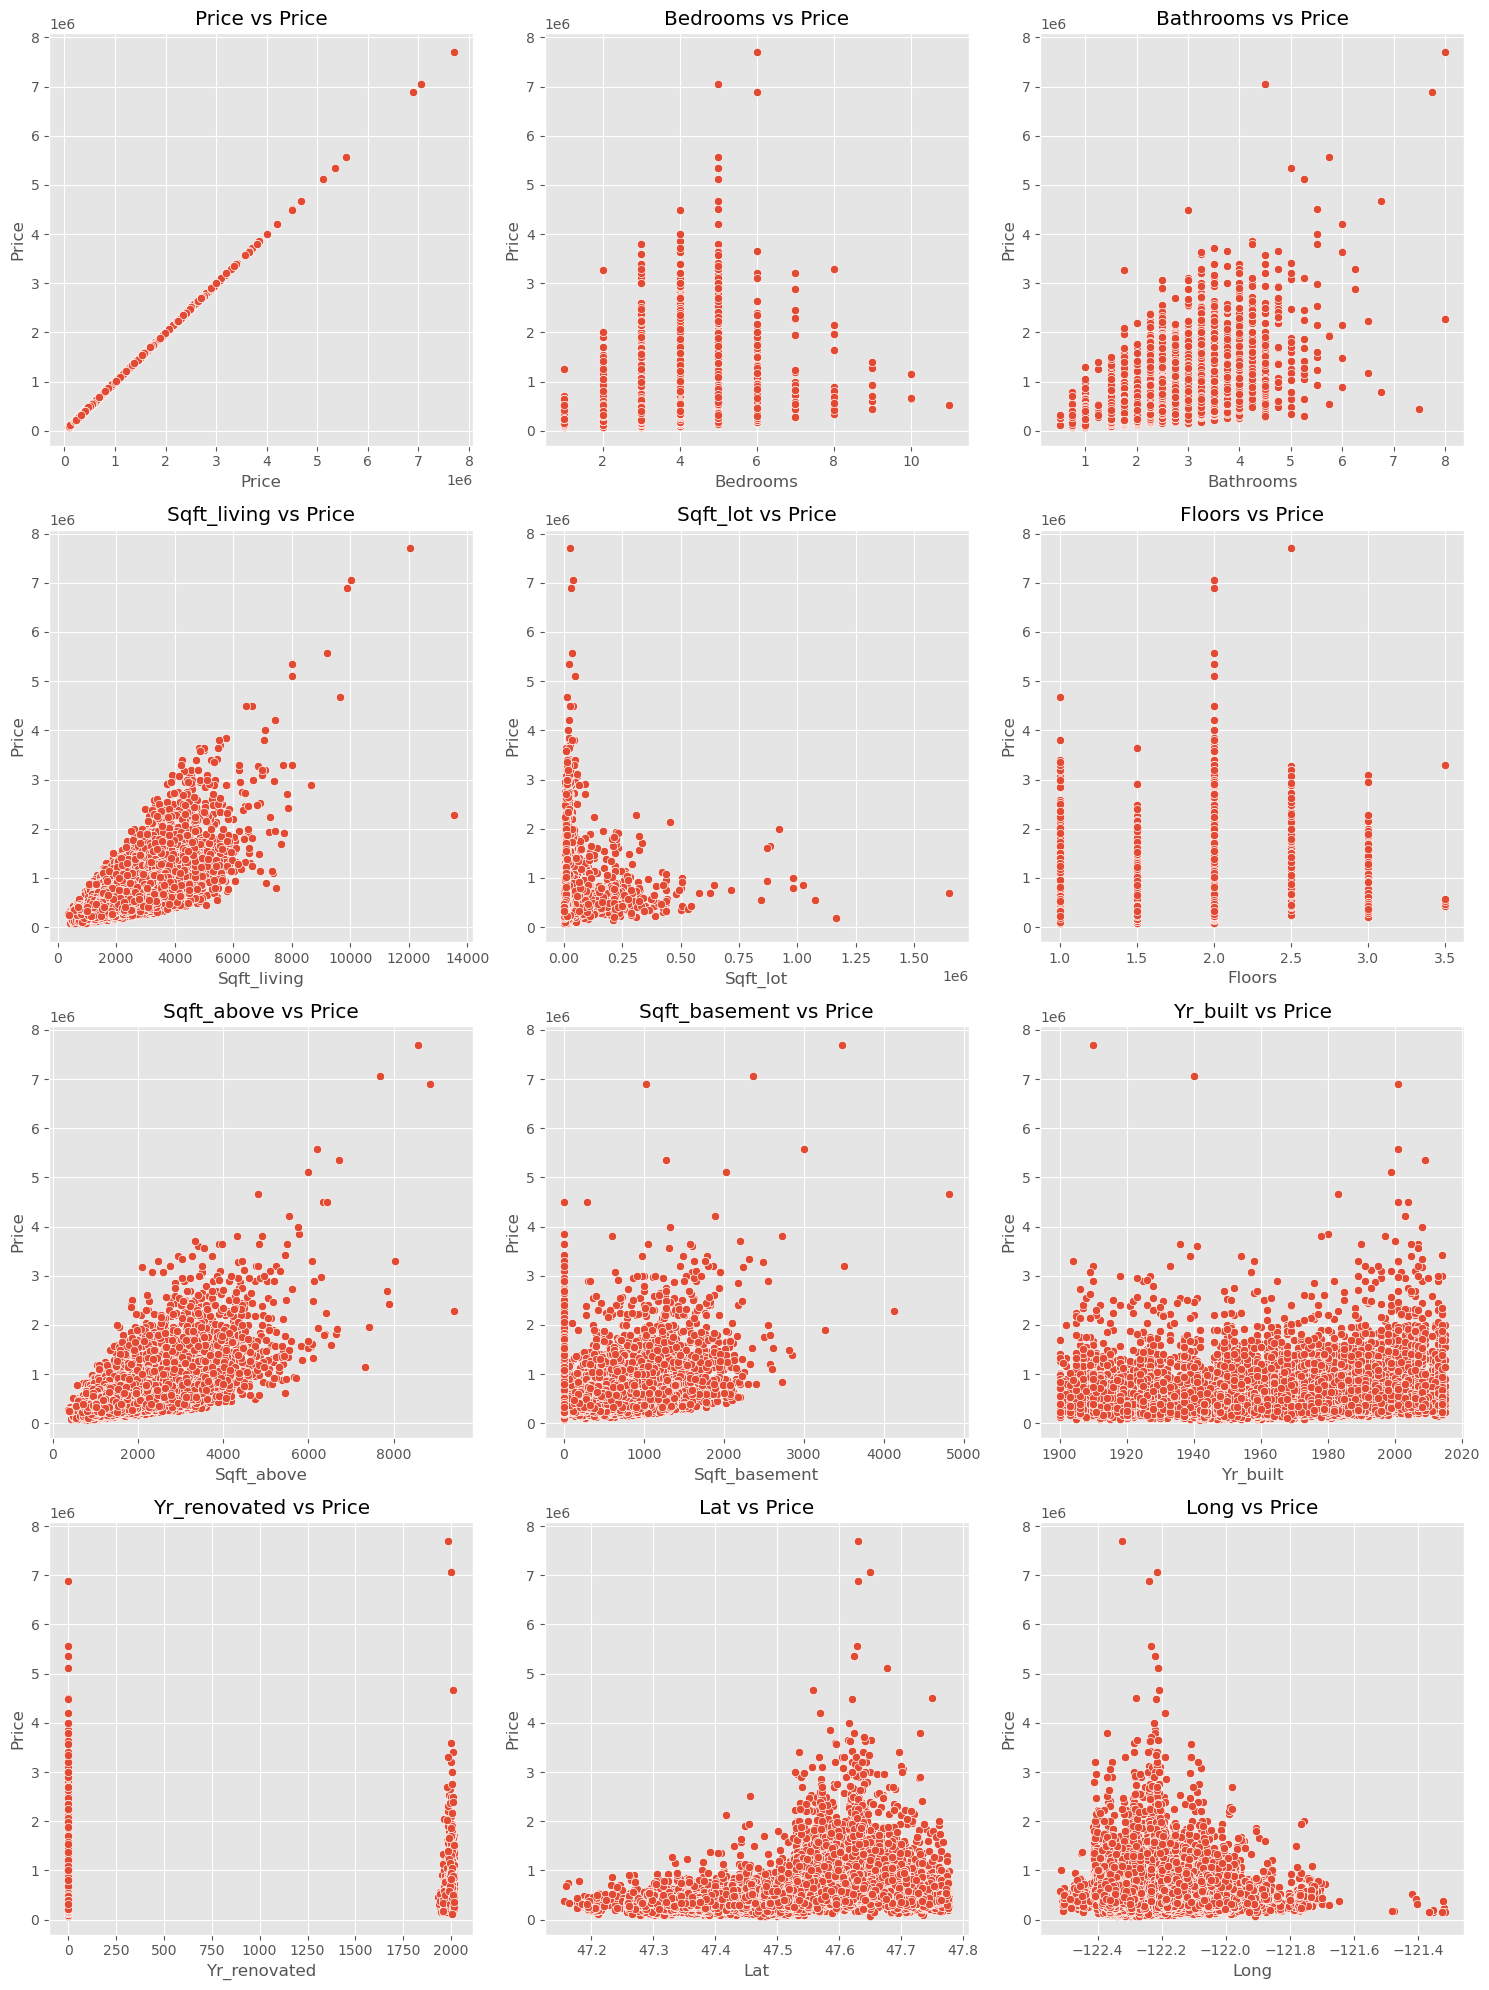

In [49]:
def plot_numerical_vs_price(df, numerical_columns):
    """
    Plot numerical columns against the price column in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        numerical_columns (list): A list of numerical column names.

    Returns:
        None
    """
    num_cols = len(numerical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(numerical_columns):
        plt.subplot(rows, 3, i+1)
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

plot_numerical_vs_price(king_county_df, numerical_columns)



**Bedrooms vs Price**:

There’s an increase in price with the number of bedrooms, but it’s not linear.
Homes with around 5-6 bedrooms have higher variability in price

**Bathrooms vs Price**:

Similar to bedrooms, more bathrooms generally correlate with a higher price.
However, there’s significant spread in the data, indicating other factors at play.

**Sqft_living vs Price**:

A clear positive correlation; larger living spaces are associated with higher prices.

**Sqft_lot vs Price**:

The correlation is less clear. Lot size (sqft_lot) might not be as influential on price

**Floors vs Price**:

Houses with more floors tend to have a higher price, but the relationship isn’t strong or linear.

**Sqft_above vs Price**:

Similar to sqft_living, more above-ground space correlates with higher prices.
Include sqft_above in your model

**Sqft_basement vs Price**:

There’s some positive correlation, but it’s weaker than sqft_living or sqft_above.
Consider it as a secondary feature.

**Yr_built vs Price**:

Newer houses tend to cost more, but there’s considerable variation in prices of older homes.
Year built is relevant but not the sole determinant

**Yr_renovated vs Price**:

Recently renovated houses can command higher prices.
Many old houses haven’t been renovated yet still have high values due to other factors like location or size.

**Zipcode vs Price**:

Certain zip codes (areas) have considerably higher median house prices.
Location plays a crucial role in determining house price.


**Relationship with categorical features**

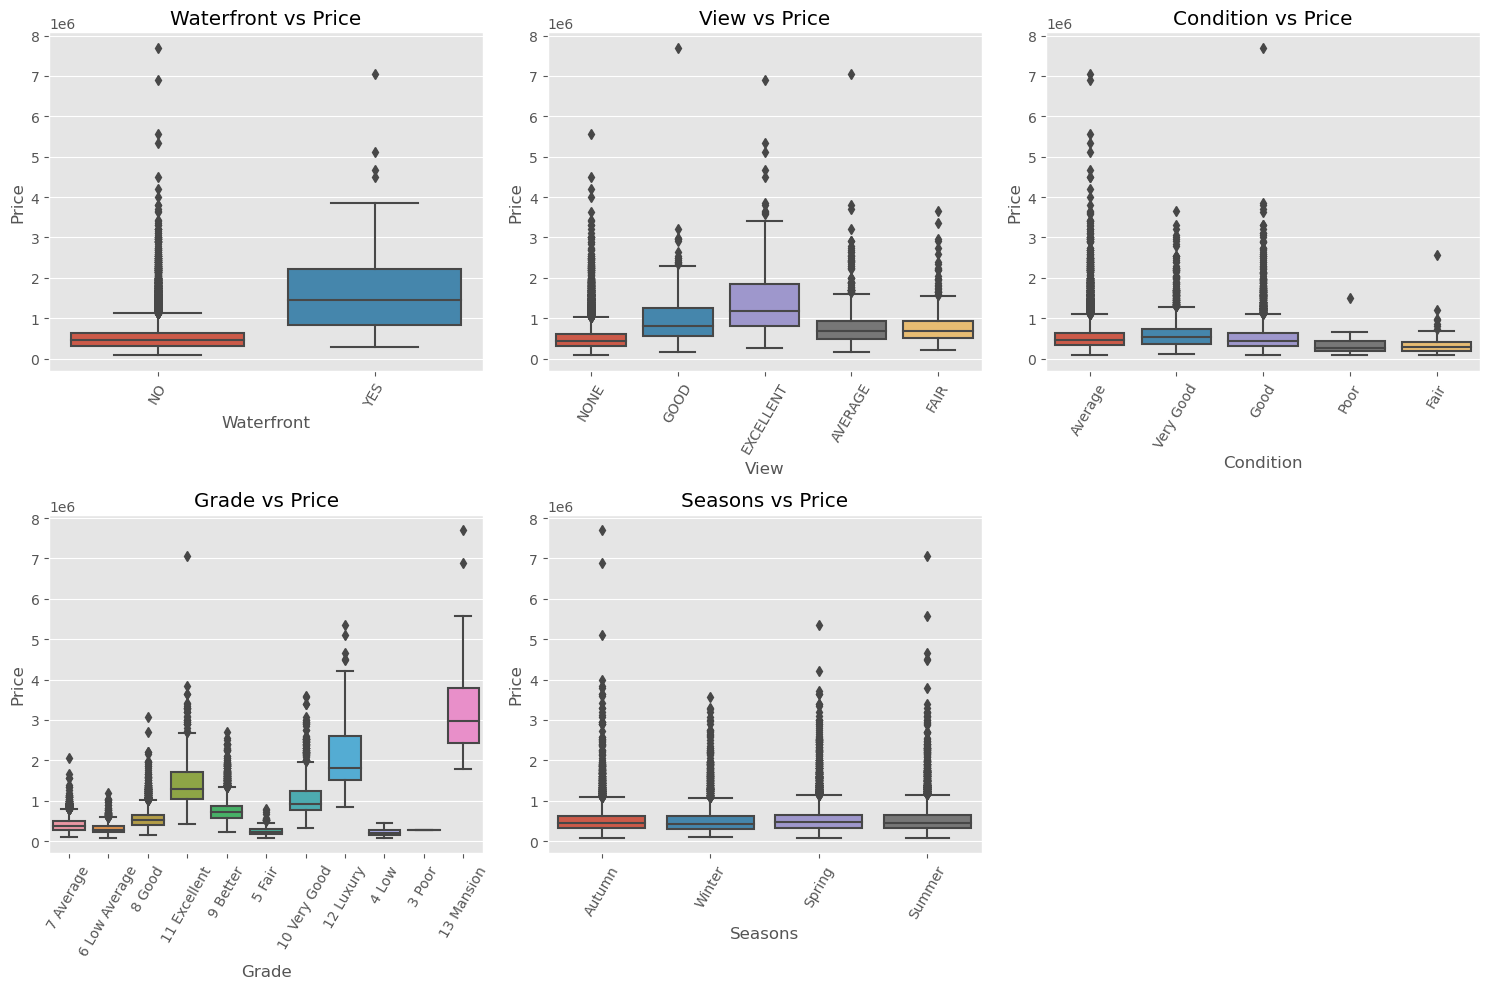

In [50]:

def plot_categorical_vs_price(df, categorical_columns):
    """
    Plot categorical columns against the price column in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_columns (list): A list of categorical column names.

    Returns:
        None
    """
    num_cols = len(categorical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(categorical_columns):
        plt.subplot(rows, 3, i+1)
        sns.boxplot(x=df[column], y=df['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
        plt.tick_params(axis='x', labelrotation=60) 
    plt.tight_layout()
    plt.show()

categorical_columns=["waterfront","view","condition","grade", "seasons"]
plot_categorical_vs_price(king_county_df, categorical_columns)



**Waterfront vs Price**:

Homes with waterfronts tend to be significantly more expensive than those without.
Having a waterfront view can be a key determinant in pricing.

**View vs Price**:

The quality of the view impacts the price. Homes with excellent views command higher prices.
Enhancing views could potentially increase a property’s value.

**Condition vs Price**:

The condition of the home moderately influences the price. 
Very good and excellent conditions yield slightly higher prices, but not as significantly as other features like waterfront or view.

**Grade vs Price**:

There’s a strong correlation between grade and price. 
Higher-graded homes (especially those rated as Mansion or Luxury) fetch higher prices.

**Seasons vs price**:

The peak season for home sales typically occurs during the spring and summer months




**Identifying the peak and off-peak seasons for house sales.**

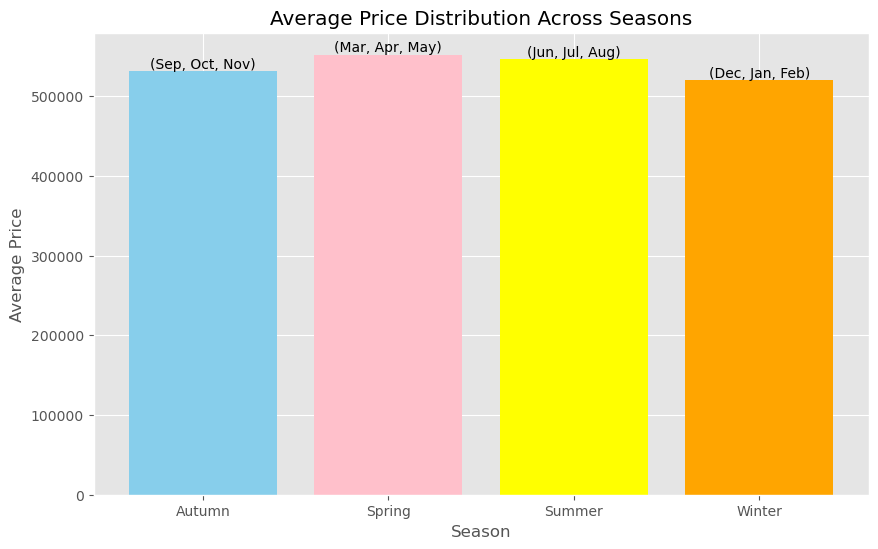

In [51]:
# Define a dictionary mapping each season to its corresponding months
season_to_months = {
    "Spring": ["Mar", "Apr", "May"],
    "Summer": ["Jun", "Jul", "Aug"],
    "Autumn": ["Sep", "Oct", "Nov"],
    "Winter": ["Dec", "Jan", "Feb"]
}

# Group by season and calculate the mean price
seasonal_avg_price = king_county_df.groupby('seasons')['price'].mean()

# Create a bar plot for the average price per season
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg_price.index, seasonal_avg_price.values, color=('skyblue',"pink","yellow","orange"))
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average Price Distribution Across Seasons')

# Add text annotations for the months corresponding to each season
for season, months in season_to_months.items():
    month_text = ', '.join(months)
    plt.text(season, seasonal_avg_price[season], f"({month_text})", ha='center', va='bottom')

plt.show()




**Peak Home Sales Season**

The peak season for home sales typically occurs during the spring and summer months.
Specifically, the busiest home selling months are March,April, May, June, July, and August.
Buyers are actively searching for properties, and there’s typically increased demand.

The slowest months for home selling activity are November, December, January, and February.
Demand tends to be lower during these months.

factors Influencing Seasonality:

**Weather** Warmer weather encourages more people to explore the housing market.

**School Year**: Families often want to move before the start of the school year, which aligns with the spring and summer months.


### 5 MODELLING

In [52]:
# #Pairplot for visualizing relationships between numerical features
# sns.pairplot(king_county_df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'])
# plt.suptitle('Pairplot of Numerical Features', y=1.02)
# plt.show()

**checking for Correlations**:


There is a **positive correlation** between the number of bedrooms, bathrooms, and the overall living space (sqft_living) with the price of houses. This makes sense since larger houses with more bedrooms and bathrooms tend to be more expensive.

The sqft_lot feature does not show a strong correlation with the price. This suggests that the size of the lot (land area) may not be as significant a predictor of house prices.

The distribution of house prices appears to be right-skewed, meaning there are few very high-priced houses in the dataset. To improve model performance, you might consider applying transformations or scaling to normalize this feature.

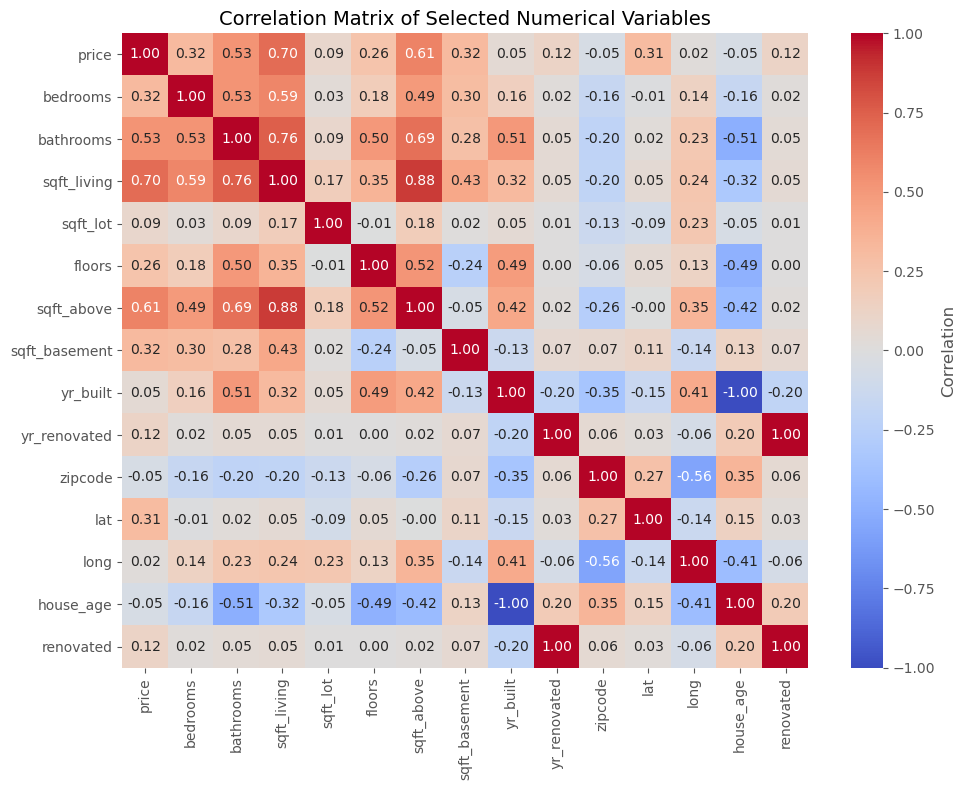

In [53]:
"""
Plot the correlation matrix of the selected numerical variables in the DataFrame.

Parameters:
- df: DataFrame containing numerical variables.
"""
plt.figure(figsize=(10, 8))
correlation_matrix = king_county_df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Selected Numerical Variables', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Extract the colorbar from the heatmap
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', fontsize=12)  # Set label for the colorbar

plt.show()




**Observations:** 

**Variables Related to Price**

sqft_living (0.70) and bathrooms (0.53) have a strong positive correlation with price. This means that as the living area (square footage) and the number of bathrooms increase, the house price tends to increase.

bedrooms (0.32), floors (0.26), and sqft_above (0.61) also positively correlate with price, although not as strongly.

There is a weak negative correlation between zipcode (-0.05) and price. This suggests that the specific location (zipcode) may not significantly impact the house price.

**Strongly Related Variables**

sqft_living has a strong positive correlation with both bathrooms (0.76) and sqft_above (0.88). This indicates that these variables are related and might contain similar information for predicting house prices.

Additionally, there’s a notable positive correlation between ‘bedrooms’ and ‘bathrooms’ (0.53).


**Negative Correlation**

The year built (yr_built) has a negative relationship with the zipcode (-0.35). This means that older houses tend to be located in certain zipcodes.

**Twin Variables**

Given their high correlations, ‘sqft_living’ can be considered twins with ‘bathrooms’ and ‘sqft_above’. This implies that these variables share similar predictive power for house prices.

**CHECKING FOR MULTICOLLINEARITY**

How does each independent variable relate with the other

In [54]:
def high_correlation_pairs(df, threshold=0.75):
    """
    Find pairs of variables with high correlation in the DataFrame.

    Parameters:
    - df: DataFrame containing numerical variables.
    - threshold: Threshold value for correlation. Default is 0.75.

    Returns:
    - DataFrame containing pairs of variables with correlation above the threshold.
    """
    # Calculate absolute correlations
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # Zip the variable name columns in a new column named "pairs"
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

    # Set index to pairs
    df_corr.set_index(['pairs'], inplace=True)

    # Drop level columns
    df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

    # Rename correlation column
    df_corr.columns = ['cc']

    # Drop duplicates
    df_corr.drop_duplicates(inplace=True)

    # Filter pairs with correlation above the threshold
    high_corr_pairs = df_corr[(df_corr.cc > threshold) & (df_corr.cc < 1)]

    return high_corr_pairs

high_correlation_pairs(king_county_df)


,cc
pairs,
"(yr_built, house_age)",1.000000
"(yr_renovated, renovated)",0.999968
"(sqft_above, sqft_living)",0.876553
"(bathrooms, sqft_living)",0.755277


Observations:

The mentioned pairs demonstrate the highest correlation with each other.

Hence, incorporating all of these variables would introduce multicollinearity into the model, prompting us to eliminate some of them

**Preparing data for modelling**

* The above pairs are the most highly collerated to each other.
* Therefore adding all those variables will bring about multicollinearity in the model so we will drop some of them.

In [55]:
king_county_df.drop(['date','yr_built','sqft_above','seasons','yr_renovated', "bathrooms"], axis=1, inplace=True)
king_county_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,house_age,renovated
0,221900.0,3,1180,5650,1.0,NO,NONE,Average,7 Average,0.0,98178,47.5112,-122.257,60,0
1,538000.0,3,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,98125,47.7210,-122.319,64,1
2,180000.0,2,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,98028,47.7379,-122.233,82,0
3,604000.0,4,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,98136,47.5208,-122.393,50,0
4,510000.0,3,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,98074,47.6168,-122.045,28,0


In [56]:
high_correlation_pairs(king_county_df)

,cc
pairs,


#### One hot encoding

In [57]:
# Define one-hot encoding categorical functions
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True, dtype=int)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

columns=["waterfront",'view','condition', "grade"]

# Apply one_hot encoding to king_County_df
king_county_transform = one_hot_encode(king_county_df, columns)


In [58]:
king_county_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   sqft_living          21534 non-null  int64  
 3   sqft_lot             21534 non-null  int64  
 4   floors               21534 non-null  float64
 5   sqft_basement        21534 non-null  float64
 6   zipcode              21534 non-null  int64  
 7   lat                  21534 non-null  float64
 8   long                 21534 non-null  float64
 9   house_age            21534 non-null  int64  
 10  renovated            21534 non-null  int32  
 11  waterfront_YES       21534 non-null  int32  
 12  view_EXCELLENT       21534 non-null  int32  
 13  view_FAIR            21534 non-null  int32  
 14  view_GOOD            21534 non-null  int32  
 15  view_NONE            21534 non-null 

In [59]:
king_county_df["grade"].value_counts()

7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [60]:
# #one hot encoding waterfront,view and condition
# king_county_transform = pd.get_dummies(king_county_df, columns=["waterfront",'view','condition'], dtype=int)
# king_county_transform = king_county_transform.drop(["condition_Poor",'view_NONE','waterfront_NO'], axis=1)
# king_county_transform

The reference categories for view will be None, for waterfront will be No and for condition will be poor condition

#### Label Encoding

In [61]:
# #Convert grade column to numeric using label encoding

# label_encoder = LabelEncoder()
# king_county_transform['grade'] = label_encoder.fit_transform(king_county_transform['grade'])
# king_county_transform['grade'].value_counts()

In [62]:
king_county_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   sqft_living          21534 non-null  int64  
 3   sqft_lot             21534 non-null  int64  
 4   floors               21534 non-null  float64
 5   sqft_basement        21534 non-null  float64
 6   zipcode              21534 non-null  int64  
 7   lat                  21534 non-null  float64
 8   long                 21534 non-null  float64
 9   house_age            21534 non-null  int64  
 10  renovated            21534 non-null  int32  
 11  waterfront_YES       21534 non-null  int32  
 12  view_EXCELLENT       21534 non-null  int32  
 13  view_FAIR            21534 non-null  int32  
 14  view_GOOD            21534 non-null  int32  
 15  view_NONE            21534 non-null 

In [63]:
king_county_transform.head()

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long,house_age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1180,5650,1.0,0.0,98178,47.5112,-122.257,60,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2570,7242,2.0,400.0,98125,47.7210,-122.319,64,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,770,10000,1.0,0.0,98028,47.7379,-122.233,82,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,1960,5000,1.0,910.0,98136,47.5208,-122.393,50,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,1680,8080,1.0,0.0,98074,47.6168,-122.045,28,...,0,0,0,0,0,0,0,0,1,0


In [64]:
king_county_transform.corr()['price']

price                  1.000000
bedrooms               0.315229
sqft_living            0.701587
sqft_lot               0.090338
floors                 0.257052
sqft_basement          0.319082
zipcode               -0.053620
lat                    0.307868
long                   0.022417
house_age             -0.054273
renovated              0.117668
waterfront_YES         0.259220
view_EXCELLENT         0.304674
view_FAIR              0.093147
view_GOOD              0.183962
view_NONE             -0.358311
condition_Fair        -0.051633
condition_Good        -0.032003
condition_Poor        -0.019963
condition_Very Good    0.057674
grade_11 Excellent     0.358257
grade_12 Luxury        0.284765
grade_13 Mansion       0.212890
grade_3 Poor          -0.005177
grade_4 Low           -0.031754
grade_5 Fair          -0.084908
grade_6 Low Average   -0.209960
grade_7 Average       -0.316713
grade_8 Good           0.005135
grade_9 Better         0.237301
Name: price, dtype: float64

* Sqft_living has the strongest positive correlation with price
* Sqft_basement, bedrooms and view_EXCELLENT has low positive correlation with price
* Grade, Age and condition have weak negative correlation

## 5 REGRESSION MODELLING

Before beginning the modelling step, it is important that we consider what our goals are and what metrics of evaluation we will use. 

As a starting point, we are looking to establish the following models, each meeting different criteria.

**Model A**

This model will be generalisable. We will aim where possible to ensure it can be used as a basis towards creating a model for another area, so avoid features specific to King County such as exact `zipcode`. Provided we achieve a decent $R^2$, we will try and avoid interactions and/or polynomial regression. We will also try and limit the number of features if possible.

**Model B**

This model will be the more accurate whilst avoiding unecessary complexity.

**Model C**

This model will be our more accurate than model B and most likely complex. 

**Model D**

This model will be our most accurate and most likely complex. We will aim for the highest adjusted $R^2$ value and lowest Root Mean Squared Error (RMSE) for model C.

For all models, we only wish to have statistically significant features (p-value below 0.05).

### 5.1 Simple linear regression-Model A

We will begin with a simple linear regression model, using the single feature of `sqft_living` which looked to be a good predictor based on satisfying the linearity assumption and being positively correlated with price.

In [65]:
# Define X_train and y_train. As single feature need to reshape X_train1 into column vector
X_train1 = np.array(king_county_transform['sqft_living']).reshape(-1,1)
y_train1 = king_county_transform['price']

In [66]:
# Create model in OLS
def  modeling_function(X,y):
    X_int = sm.add_constant(X)
    model = sm.OLS(y, X_int).fit()
    summary = model.summary()
    return model, summary, X_int
model_A=modeling_function(X_train1, y_train1)
model_A[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        11:48:29   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
x1           279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As one might expect, using a single feature did not provide a strong model. 

The $R^2$ metric indicates that only 49% of the variance can be explained by our model.

Let us evaluate it by computing the RMSE.

In [67]:
# Function to get the RMSE for the regression performed
def rmse_function(x,y):
    # Create linear regression object
    linreg = LinearRegression()

    # Fit on training data
    linreg.fit(x, y)

    # Evaluate using rmse
    scores = cross_val_score(
                linreg, 
                x,
                y,
                cv=10,
                scoring="neg_mean_squared_error"
    )
    rmse_scores= np.sqrt(-scores)
    return rmse_scores,rmse_scores.mean(),rmse_scores.std()

rmse1=rmse_function(X_train1, y_train1)
rmse1

(array([264588.73740414, 281006.60140913, 248466.74475835, 283185.23488167,
        245037.59908383, 248515.39972768, 248475.17382312, 258382.33354171,
        261821.3018611 , 267529.86457734]),
 260700.8991068073,
 12958.457701152043)

We can interpret the RMSE as the mean error in USD, which is approximately USD 260,700. This means that, on average, the actual price will deviate by around USD 260,700 from our predicted price. Despite using just one feature, this level of error is reasonable. Additionally, the standard deviation of approximately USD 12,958 indicates that our model doesn't appear to be overfitting.

The coefficient of `sqft_living` is 279.93, suggesting that for every additional square foot of living area, the price increases by approximately USD 279.93. In other words, if house A has a living area 1 sqft larger than house B, all other features being equal, house A will cost around USD 279 more.

One advantage of simple linear regression is its visual interpretability. Let's create a visualization illustrating the data points alongside our regression line.


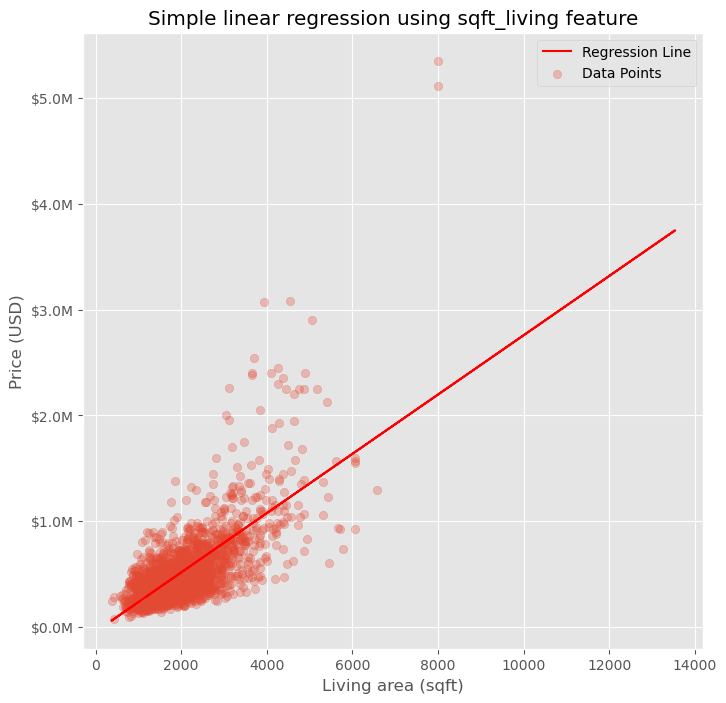

In [68]:
# Create visualisation of simple linear regression

def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'

linreg = LinearRegression()
# Fit on training data
linreg.fit(X_train1, y_train1)
# Get predictions
y_pred = linreg.predict(X_train1)
# Plot data points
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(x = X_train1[:2000], y = y_train1[:2000], alpha = 0.3, label = 'Data Points')

# Plot regression line
plt.plot(X_train1, y_pred, color = 'red', label = 'Regression Line')
ax.yaxis.set_major_formatter(millions)
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

We see that for smaller living areas our model looks decent but as the `sqft_living` value increases our model's performance declines, signifiying that `sqft_living` is not a good enough predictor for larger houses.

We will want to keep track of our models so let us build a table which will have the name of the model and key metrics.

In [69]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
evaluationtable = pd.DataFrame({'Model': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': [],'RMSE sd':[]})

# Add data for simple linear regression
evaluationtable.loc[0] = ['Model-A', 'Sqft_living', model_A[0].df_model, round(model_A[0].rsquared,3)
                          ,round(model_A[0].rsquared_adj,3), int(rmse1[1]), int(rmse1[2]) ]

# View our evaluation table
evaluationtable

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Model-A,Sqft_living,1.0,0.492,0.492,260700.0,12958.0


### 5.2 Multiple Linear Regression - Model B

For our next model, we will add more features.

In [70]:
# Redefine X_train and y_train
X_train2 = king_county_transform.drop(['price'], axis = 1)
y_train2 = king_county_transform['price']

# Calling on fucntion to provide model summary
model_B=modeling_function(X_train2,y_train2)
model_B[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1978.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        11:48:29   Log-Likelihood:            -2.9243e+05
No. Observations:               21534   AIC:                         5.849e+05
Df Residuals:                   21504   BIC:                         5.852e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.125e+06   2.71e+06      3.361      0.001     3.8e+06    1.44e+07
bedrooms            -1.683e+04   1892.295     -8.896      0.000   -2.05e+04   -1.31e+04
sqft_living           158.8588      3.184     49.892      0.000     152.618     165.100
sqft_lot               -0.0603      0.033     -1.816      0.069      -0.125       0.005
floors               3.599e+04   3325.502     10.821      0.000    2.95e+04    4.25e+04
sqft_basement           2.7315      4.104      0.665      0.506      -5.314      10.777
zipcode              -641.0210     31.469    -20.370      0.000    -702.702    -579.340
lat                  6.231e+05   1.02e+04     60.895      0.000    6.03e+05    6.43e+05
long                -2.011e+05   1.24e+04    -16.278      0.000   -2.25e+05   -1.77e+05
house_age            1899.6369     66.662     28.497      0.000    1768.975    2030.299
renovated            7.672e+04   7530.261     10.188      0.000     6.2e+04    9.15e+04
waterfront_YES       5.233e+05   1.95e+04     26.821      0.000    4.85e+05    5.62e+05
view_EXCELLENT       2.002e+05   1.46e+04     13.759      0.000    1.72e+05    2.29e+05
view_FAIR            4.883e+04   1.22e+04      3.991      0.000    2.48e+04    7.28e+04
view_GOOD            6.976e+04   1.06e+04      6.611      0.000    4.91e+04    9.04e+04
view_NONE           -7.885e+04   6523.209    -12.088      0.000   -9.16e+04   -6.61e+04
condition_Fair      -7989.4259   1.49e+04     -0.535      0.593   -3.73e+04    2.13e+04
condition_Good       2.839e+04   3322.475      8.545      0.000    2.19e+04    3.49e+04
condition_Poor      -5.762e+04   3.59e+04     -1.607      0.108   -1.28e+05    1.27e+04
condition_Very Good  7.598e+04   5274.609     14.405      0.000    6.56e+04    8.63e+04
grade_11 Excellent   2.521e+05   1.14e+04     22.099      0.000     2.3e+05    2.75e+05
grade_12 Luxury      6.839e+05   2.19e+04     31.294      0.000    6.41e+05    7.27e+05
grade_13 Mansion       1.9e+06   5.44e+04     34.901      0.000    1.79e+06    2.01e+06
grade_3 Poor        -2.537e+05   1.92e+05     -1.323      0.186   -6.29e+05    1.22e+05
grade_4 Low         -4.197e+05   3.81e+04    -11.007      0.000   -4.94e+05   -3.45e+05
grade_5 Fair        -4.343e+05   1.54e+04    -28.278      0.000   -4.64e+05   -4.04e+05
grade_6 Low Average -4.111e+05   9547.227    -43.061      0.000    -4.3e+05   -3.92e+05
grade_7 Average     -3.629e+05   7872.608    -46.098      0.000   -3.78e+05   -3.47e+05
grade_8 Good        -2.928e+05   7177.486    -40.788      0.000   -3.07e+05   -2.79e+05
grade_9 Better      -1.687e+05   7042.823    -23.949      0.000   -1.82e+05   -1.55e+05
==============================================================================
Omnibus:                    14127.438   Durbin-Watson:                   1.984
Prob(Omnibus):       

We note that all p-values are below our threshold of 0.05. Compare to single linear regression, our model's accuracy has improved considerably.The R-Squared is now 68%

Let us investigate if the residuals are normally distributed.

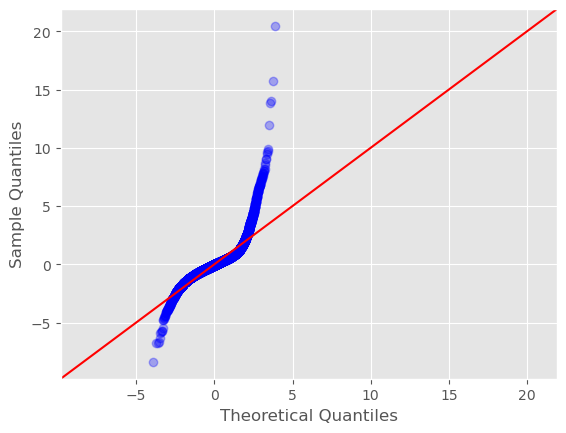

In [71]:
import scipy.stats as stats
# QQ-plot of residuals
residuals = model_B[0].resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

There appears to be some issues with the residuals not being normally distributed.

Let us check homoscedasticity.

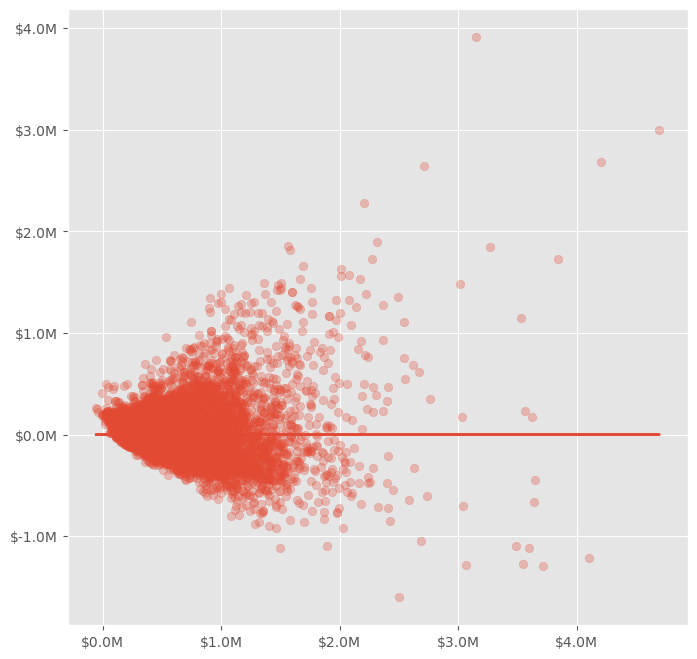

In [72]:
# Scatterplot of predictions

def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'
fig,ax=plt.subplots(figsize=(8,8))

plt.scatter(model_B[0].predict(model_B[2]), model_B[0].resid, alpha = 0.3)
plt.plot(model_B[0].predict(model_B[2]), [0 for i in range(len(X_train2))])
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)

plt.show()

Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

Let us now evaluate the model using sci-kit learn's `cross_val_score`.

In [73]:
rmse2=rmse_function(X_train2, y_train2)
rmse2

(array([196810.31701434, 211004.3512284 , 184790.53497195, 203925.210456  ,
        174246.24274081, 186708.33230201, 192134.64315246, 189112.84023086,
        189596.80332984, 200901.60526937]),
 192923.08806960372,
 10032.626897883789)

The RMSE has reduced and the mean error is now around $207,000. Our standard deviation remains low.

Let us add this model to our evaluation table.

In [74]:
# Add metric to evaluation table
evaluationtable.loc[1] = ['Model-B', 'Limited one-hot encoding', model_B[0].df_model, round(model_B[0].rsquared,3)
                          ,round(model_B[0].rsquared_adj,3), int(rmse2[1]), int(rmse2[2])]

# View our evaluation table, sorted by Adj R-squared
evaluationtable.sort_values(by = 'Adj R-squared', ascending=True)

,Model,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Model-A,Sqft_living,1.0,0.492,0.492,260700.0,12958.0
1,Model-B,Limited one-hot encoding,29.0,0.727,0.727,192923.0,10032.0


In [75]:
king_county_transform.head()

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long,house_age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1180,5650,1.0,0.0,98178,47.5112,-122.257,60,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2570,7242,2.0,400.0,98125,47.7210,-122.319,64,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,770,10000,1.0,0.0,98028,47.7379,-122.233,82,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,1960,5000,1.0,910.0,98136,47.5208,-122.393,50,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,1680,8080,1.0,0.0,98074,47.6168,-122.045,28,...,0,0,0,0,0,0,0,0,1,0


In [76]:
king_county_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   bedrooms             21534 non-null  int64  
 2   sqft_living          21534 non-null  int64  
 3   sqft_lot             21534 non-null  int64  
 4   floors               21534 non-null  float64
 5   sqft_basement        21534 non-null  float64
 6   zipcode              21534 non-null  int64  
 7   lat                  21534 non-null  float64
 8   long                 21534 non-null  float64
 9   house_age            21534 non-null  int64  
 10  renovated            21534 non-null  int32  
 11  waterfront_YES       21534 non-null  int32  
 12  view_EXCELLENT       21534 non-null  int32  
 13  view_FAIR            21534 non-null  int32  
 14  view_GOOD            21534 non-null  int32  
 15  view_NONE            21534 non-null 

### 5.3 Multiple linear regression-Model 3
This model uses th dfnehot dataframe that had been further encoded

In [77]:
# Create copy to work with
dfgeo = king_county_transform.copy()

**Assessing the geographic distribution of our house sales.**

In [78]:
def plot_zipcode_locations(df, lat_column='lat', long_column='long', zipcode_column='zipcode'):
    """
    Plot the locations of zip codes on a map using Folium.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        lat_column (str): The name of the column containing latitude values. Default is 'lat'.
        long_column (str): The name of the column containing longitude values. Default is 'long'.
        zipcode_column (str): The name of the column containing zipcode values. Default is 'zipcode'.

    Returns:
        None
    """
    # Group the data by zipcode and calculate the mean latitude and longitude
    zipcode_data = df.groupby(zipcode_column).agg({lat_column: 'mean', long_column: 'mean'}).reset_index()

    # Create a map centered at the mean latitude and longitude of all the zipcodes
    m = folium.Map(location=[df[lat_column].mean(), df[long_column].mean()], zoom_start=10)

    # Add markers for each zipcode
    for _, row in zipcode_data.iterrows():
        folium.Marker(location=[row[lat_column], row[long_column]], popup=row[zipcode_column]).add_to(m)

    # Display the map
    return m

plot_zipcode_locations(king_county_df)

In [92]:
import reverse_geocoder as rg
#Define function to add neighbourhood
def neighbourhood_feat(df):
    '''Adds neighbourhood feature using reverse_geocoder'''
    
    # Define coord column with lat and long
    df['coord'] = list(zip(df['lat'], df['long']))
    
    # Use reverse geocoder
    results = rg.search(list(df['coord']))
    
    # Define neighbourhood list
    neighbourhoods = [results[i]['name'] for i in range(0, len(results))]
    
    # Add neighbourhood feature
    df['neighbourhood'] = neighbourhoods
    
    
    return df


# Add neighbourhood feature
dfgeo = neighbourhood_feat(dfgeo)

dfgeo

TypeError: tuple indices must be integers or slices, not str

In [82]:
location_names=dfgeo["neighbourhood"].tolist()
location_names

['Bryn Mawr-Skyway',
 'Shoreline',
 'Inglewood-Finn Hill',
 'White Center',
 'City of Sammamish',
 'Union Hill-Novelty Hill',
 'Federal Way',
 'White Center',
 'Maple Valley',
 'Eastgate',
 'Inglewood-Finn Hill',
 'Kenmore',
 'City of Sammamish',
 'Seattle',
 'Seattle',
 'Duvall',
 'Seattle',
 'Auburn',
 'Federal Way',
 'Shoreline',
 'Bryn Mawr-Skyway',
 'Lea Hill',
 'Lea Hill',
 'East Hill-Meridian',
 'Auburn',
 'Seattle',
 'Seattle',
 'Lake Forest Park',
 'Redmond',
 'Issaquah',
 'Shoreline',
 'Shoreline',
 'Shoreline',
 'Fairwood',
 'Shoreline',
 'Redmond',
 'Seattle',
 'Lakeland North',
 'Newcastle',
 'City of Sammamish',
 'Normandy Park',
 'Union Hill-Novelty Hill',
 'Seattle',
 'Fairwood',
 'Duvall',
 'Fife Heights',
 'Eastgate',
 'Seattle',
 'Klahanie',
 'Normandy Park',
 'Renton',
 'Shoreline',
 'Shoreline',
 'Medina',
 'Seattle',
 'Covington',
 'Covington',
 'West Lake Sammamish',
 'Newcastle',
 'Normandy Park',
 'Normandy Park',
 'Normandy Park',
 'Seattle',
 'Seattle',
 'Sea

In [81]:
# for cords, name in zip(LOCATION_DATA, LOCATION_NAMES):
#     folium.Marker(location=[cords[0], cords[1]],
#                   popup=f"Lattitude:<br>{cords[0]}<br>"
#                         f"Longitude:<br>{cords[1]}<br>"
#                         f"Name:<br>{name}"
#                   ).add_to(folium_map)

NameError: name 'LOCATION_DATA' is not defined

In [83]:

"""
Plot the locations of zip codes on a map using Folium.

Parameters:
    df (DataFrame): The DataFrame containing the data.
    lat_column (str): The name of the column containing latitude values. Default is 'lat'.
    long_column (str): The name of the column containing longitude values. Default is 'long'.
    zipcode_column (str): The name of the column containing zipcode values. Default is 'zipcode'.

Returns:
    None
"""
# Group the data by zipcode and calculate the mean latitude and longitude
zipcode_data = king_county_df.groupby("zipcode").agg({"lat": 'mean', "long": 'mean'}).reset_index()

# Create a map centered at the mean latitude and longitude of all the zipcodes
m = folium.Map(location=[king_county_df["lat"].mean(), king_county_df["long"].mean()], zoom_start=10)

# Add markers for each zipcode
for _, row in zipcode_data.iterrows():
    folium.Marker(location=[row["lat"], row["long"]], popup=row["zipcode"]).add_to(m)


for cords, name in zip(m, location_names):
    folium.Marker(location=[cords[0], cords[1]],
                  popup=f"Lattitude:<br>{cords[0]}<br>"
                        f"Longitude:<br>{cords[1]}<br>"
                        f"Name:<br>{name}"
                  ).add_to(folium_map)
m

TypeError: 'Map' object is not iterable

In [ ]:
# One-hot encode neighbourhood
dfgeo = one_hot_encode(dfgeo, 'neighbourhood')


# Drop coord, lat, long, zipcode columns
dfgeo = dfgeo.drop(['coord', 'lat', 'long', 'zipcode'], axis = 1)
dfgeo = dfgeo.replace({True: 1, False: 0})
# Check 
dfgeo.head()

In [ ]:
# Define X_train and y_train
X_train3 = dfgeo.drop('price', axis = 1)
y_train3 = dfgeo['price']
model_C= modeling_function(X_train3, y_train3)
model_C[1]

We see that the adjusted $R^2$ has improved significantly and is now 0.819

Let us now evaluate the model using sci-kit learn's `cross_val_score`.

In [ ]:
rmse3= rmse_function(X_train3, y_train3)
rmse3

In [ ]:
# Add model to evaluation table
evaluationtable.loc[2] = ['Model-C', 'Further one-hot encoding', model_C[0].df_model, round(model_C[0].rsquared,3)
                          ,round(model_C[0].rsquared_adj,3), int(rmse3[1]), int(rmse3[2]) ]
# View our evaluation table
evaluationtable.sort_values(by = 'Adj R-squared', ascending=True)

### 5.4 Log Transformation - Model D

In [ ]:
import numpy as np

df_log = dfgeo.copy()

df_log["log(sqft_lot)"] = np.log(df_log["sqft_lot"])
# df_log["log(sqft_living)"] = np.log(df_log["sqft_living"])

df_log["log(sqft_basement)"] = np.where(df_log["sqft_basement"] == 0, 0, np.log(df_log["sqft_basement"]))
# Visually inspect raw vs. transformed values
x_df=df_log[["sqft_lot", "log(sqft_lot)", "log(sqft_basement)", "sqft_basement"]]
x_df.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Plotting histogram for sqft_lot
ax1.hist(df_log["sqft_lot"], color="blue", alpha=0.7, label="sqft_lot")
ax1.set_xlabel("sqft_lot")
ax1.legend()

# Plotting histogram for sqft_basement
ax1.hist(df_log["sqft_basement"], color="green", alpha=0.7, label="sqft_basement")
ax1.set_xlabel("sqft_basement")
ax1.legend()

# Plotting histogram for log(sqft_lot)
ax2.hist(df_log["log(sqft_lot)"], color="orange", alpha=0.7, label="log(sqft_lot)")
ax2.set_xlabel("log(sqft_lot)")
ax2.legend()

# Plotting histogram for log(sqft_basement)
ax2.hist(df_log["log(sqft_basement)"], color="red", alpha=0.7, label="log(sqft_basement)")
ax2.set_xlabel("log(sqft_basement)")
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define X_train and y_train
X_train4 = df_log.drop(['price','sqft_lot'], axis = 1)
y_train4 = df_log['price']
model_D= modeling_function(X_train4, y_train4)
model_D[1]

In [ ]:
rmse4=rmse_function(X_train4, y_train4)
rmse4

In [ ]:
# Add model to evaluation table
evaluationtable.loc[3] = ['Model-D', 'After Log Transformation', model_D[0].df_model, round(model_D[0].rsquared,3)
                          ,round(model_D[0].rsquared_adj,3), int(rmse4[1]), int(rmse4[2]) ]

# View our evaluation table
evaluationtable.sort_values(by = 'Adj R-squared', ascending=True)

From the above table you can see hour our model has improved by the R-squared Increasing while the RMSE reducing.

## 6 CONCLUSIONS AND FINDINGS

### 6.1 Summary of Findings and Recommendations

**Q1 House attributes**
- **We recommend targetting the campaign towards houses with a higher bedroom count**.
However for a given house depending on its square-footage, note that adding an additional bedroom does not necessarily result in a a sale price increase.
* We can see that square foot living has the highest influence on the price of the house. 
* The variables that have a major influence on the price of the house are; square foot living, age of the house,good condition of the house,if the house is on a waterfront and has an excellent view.
* The variables that has the least influence on the price of the house are; grade,number of bedrooms,sqft lot,sqft basement and sqft lot.

**Q2 Time of the year**

The peak season for home sales typically occurs during the spring and summer months.
Specifically, the busiest home selling months are March,April, May, June, July, and August.
Buyers are actively searching for properties, and there’s typically increased demand.

The slowest months for home selling activity are November, December, January, and February.
Demand tends to be lower during these months.

**Factors Influencing Seasonality**

**Weather** Warmer weather encourages more people to explore the housing market.

**School Year**:Families often want to move before the start of the school year, which aligns with the spring and summer months.

**Q3 Model**

A model was developed using linear regression and it provided details such how the square footage of living space affects pricing levels, thus influencing market trends.

**Q4 Location**

Waterfront living is key, with the median house price for a house with a waterfront view being almost double that of one that does not have this feature.

## 7 RECOMMENDATIONS

### Future Work

The following data would provide additional insights and improve our model's performance.

**Commuting time**
Time it takes from the house location to downtown Seattle could be a good indicator, with better connected properties potentially being valued higher.

**Median Income per zipcode**
Understanding income distribution amongst zipcodes would also be an indicator of which neighbourhoods are more affluent and should be the focus of the campaign.

**Longer time span**
Having data beyond the one year of May 2014-May 2015 would let us examine whether there are any trends in location. For instance some neighbourhoods may be experiencing a price increase due to recent infrastructure development. Which areas are up and coming?

**School rankings**
Proximity to a good school is often a key requirement for wealthy parents and likely to drive a house price up.

**House Architectural Shape**: Additionally investigate certain features, such as constructional/architectural values of the house, to see what trends we could discern from that. 

In addition, further work on our model would include the following:
- investigating Principal Component Analysis to tackle multicollinearity
- considering other algorithms beyong linear regression
- consider regression methods to deal with under/over fitting

Finally with input from our stakeholders we could develop a more tailored model, focusing on houses of a certain value or in a certain neighbourhood.

Appendix:
1. Trends on house flipping in the US

https://www.attomdata.com/news/market-trends/flipping/attom-year-end-2022-u-s-home-flipping-report/